In [2]:
# Importing Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
df = pd.read_csv("epi_r.csv")

print("Total Rows and Columns",df.shape,'\n')
print("Top 5 rows", df.head(),'\n')
print("Bottom 5 rows",df.tail(),'\n')

# Check datatypes of all columns
print(df.info(),'\n')
print(df.columns)   

Total Rows and Columns (20052, 680) 

Top 5 rows                                          title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

 

In [4]:
# Statistics of Numerical columns
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning and Pre-processing

### Handeling Duplicated values

In [5]:
df.duplicated().sum()

1801

In [6]:
# Check for duplicated values in each column
duplicated_columns = {}

for col in df.columns:
    if df[col].duplicated().any():
        duplicated_columns[col] = df[col].duplicated().sum()

duplicated_columns

{'title': 2316,
 'rating': 20044,
 'calories': 18193,
 'protein': 19769,
 'fat': 19725,
 'sodium': 17617,
 '#cakeweek': 20050,
 '#wasteless': 20050,
 '22-minute meals': 20050,
 '3-ingredient recipes': 20050,
 '30 days of groceries': 20050,
 'advance prep required': 20050,
 'alabama': 20050,
 'alaska': 20050,
 'alcoholic': 20050,
 'almond': 20050,
 'amaretto': 20050,
 'anchovy': 20050,
 'anise': 20050,
 'anniversary': 20050,
 'anthony bourdain': 20050,
 'aperitif': 20050,
 'appetizer': 20050,
 'apple': 20050,
 'apple juice': 20050,
 'apricot': 20050,
 'arizona': 20050,
 'artichoke': 20050,
 'arugula': 20050,
 'asian pear': 20050,
 'asparagus': 20050,
 'aspen': 20050,
 'atlanta': 20050,
 'australia': 20050,
 'avocado': 20050,
 'back to school': 20050,
 'backyard bbq': 20050,
 'bacon': 20050,
 'bake': 20050,
 'banana': 20050,
 'barley': 20050,
 'basil': 20050,
 'bass': 20050,
 'bastille day': 20050,
 'bean': 20050,
 'beef': 20050,
 'beef rib': 20050,
 'beef shank': 20050,
 'beef tenderloi

In [7]:
df.drop_duplicates(inplace=True)
print(df.shape)
print(df.duplicated().sum())

(18251, 680)
0


Observation - Out of 20052 rows, 1801 (8.9%) has duplicated values.

### Checking Unique values in each columns

In [8]:
# Loop through each column and print 'unique values' along with their counts
for col in df.columns:
    unique_values = df[col].unique()
    unique_count = len(unique_values)
    
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print(f"Count of unique values: {unique_count}\n")

Unique values in column 'title':
['Lentil, Apple, and Turkey Wrap '
 'Boudin Blanc Terrine with Red Onion Confit '
 'Potato and Fennel Soup Hodge ' ... 'Turkey Cream Puff Pie '
 'Snapper on Angel Hair with Citrus Cream '
 'Baked Ham with Marmalade-Horseradish Glaze ']
Count of unique values: 17736

Unique values in column 'rating':
[2.5   4.375 3.75  5.    3.125 1.875 0.    1.25 ]
Count of unique values: 8

Unique values in column 'calories':
[ 426.  403.  165. ... 2006. 2417. 1986.]
Count of unique values: 1859

Unique values in column 'protein':
[3.00000e+01 1.80000e+01 6.00000e+00         nan 2.00000e+01 1.90000e+01
 7.00000e+00 2.30000e+01 4.00000e+00 1.20000e+01 1.10000e+01 5.00000e+00
 5.90000e+01 1.00000e+01 3.00000e+00 1.00000e+00 0.00000e+00 3.90000e+01
 4.40000e+01 2.00000e+00 1.40000e+01 8.00000e+00 8.90000e+01 3.80000e+01
 2.10000e+01 9.00000e+00 5.40000e+01 3.60000e+01 4.50000e+01 4.80000e+01
 6.30000e+01 9.20000e+01 2.20000e+01 1.50000e+01 1.30000e+01 5.50000e+01
 1.70000

## Handeling Missing values

In [9]:
# Check for missing values
# Find columns with missing values

missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0] 
# missing_values[missing_values > 0] / len(df[col]) * 100
print(missing_columns)

calories    3749
protein     3781
fat         3801
sodium      3750
dtype: int64


In [10]:
# df[['calories','protein','fat','sodium']].head()

In [11]:
# Impute missing values in 'calories', 'protein', 'fat', and 'sodium' using their respective means
df[['calories','protein', 'fat', 'sodium']] = df[['calories','protein', 'fat', 'sodium']].fillna(df[['calories','protein', 'fat', 'sodium']].mean())

# Verify the null values after imputation
print(df[['calories','protein', 'fat', 'sodium']].isna().sum())
print(df.shape)

calories    0
protein     0
fat         0
sodium      0
dtype: int64
(18251, 680)


Observation - calories,protein,fat,sodium has almost 18%-19% Missing or Null values. Instead of removing all values,
              first I removed that rows where all rows of this 4 columns has NaN values and imputed other rows with "mean".

## Handeling Outliers

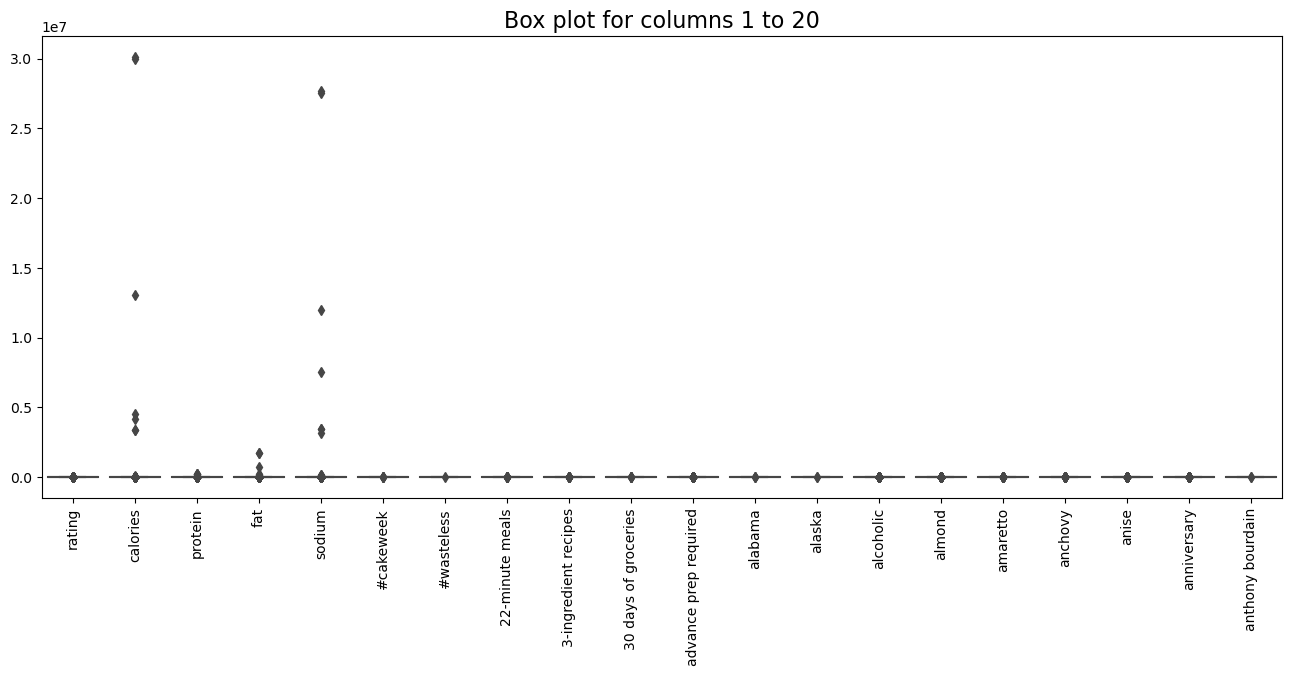

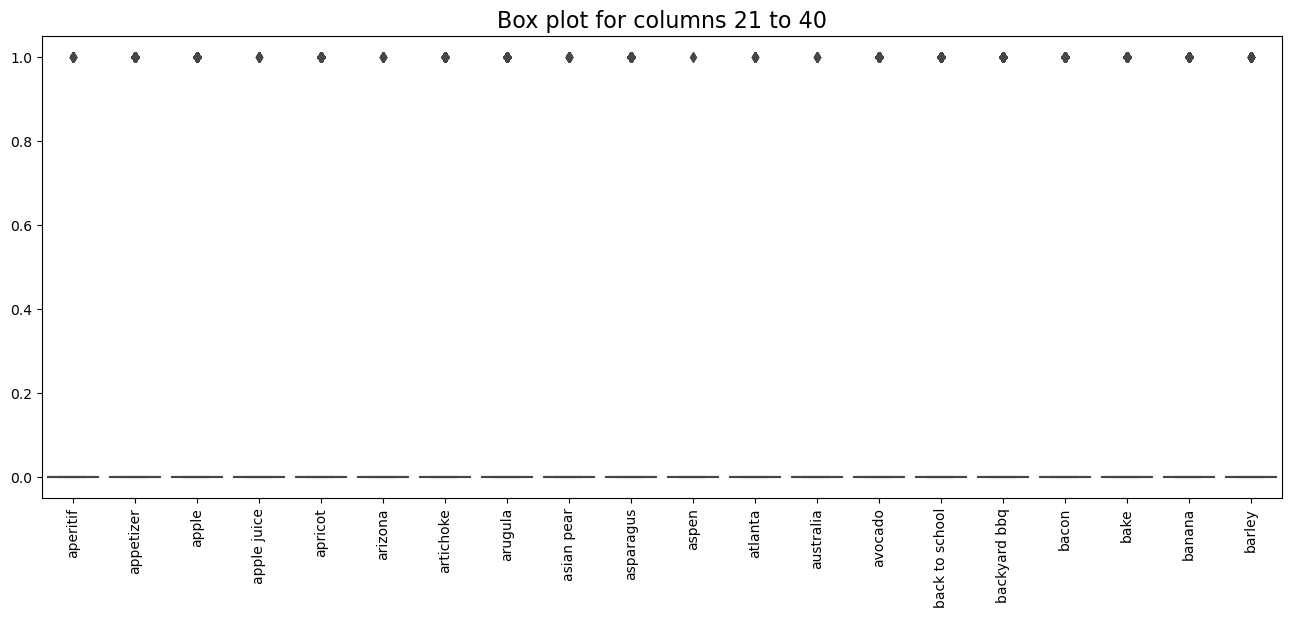

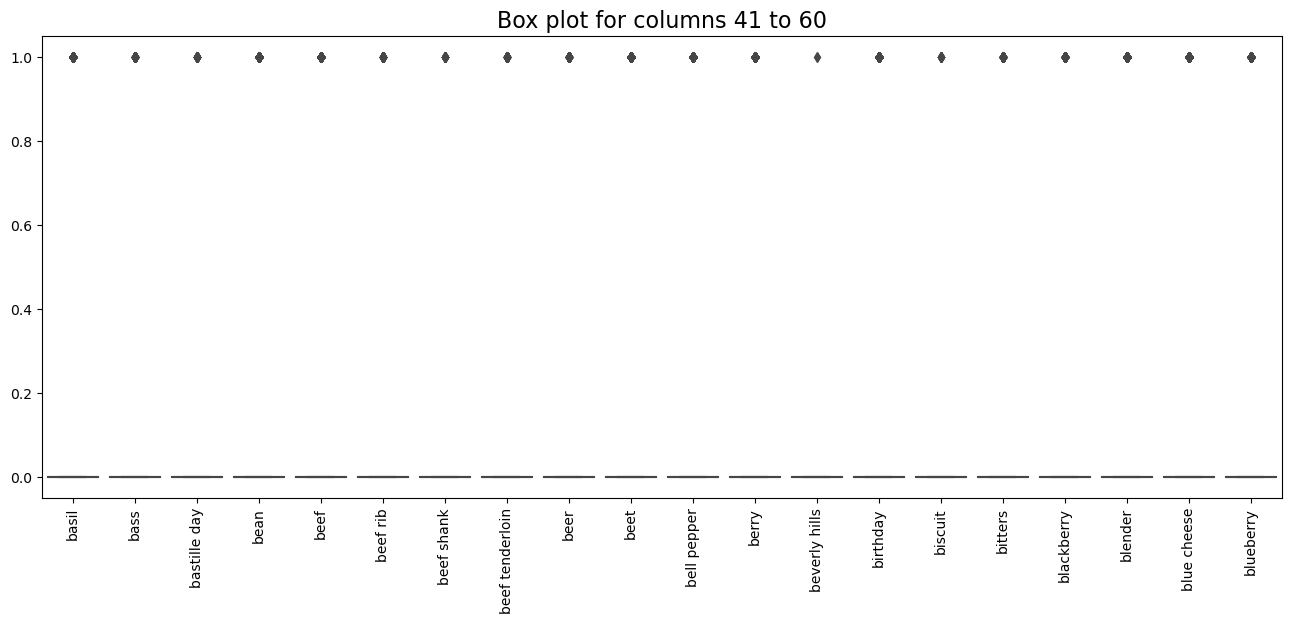

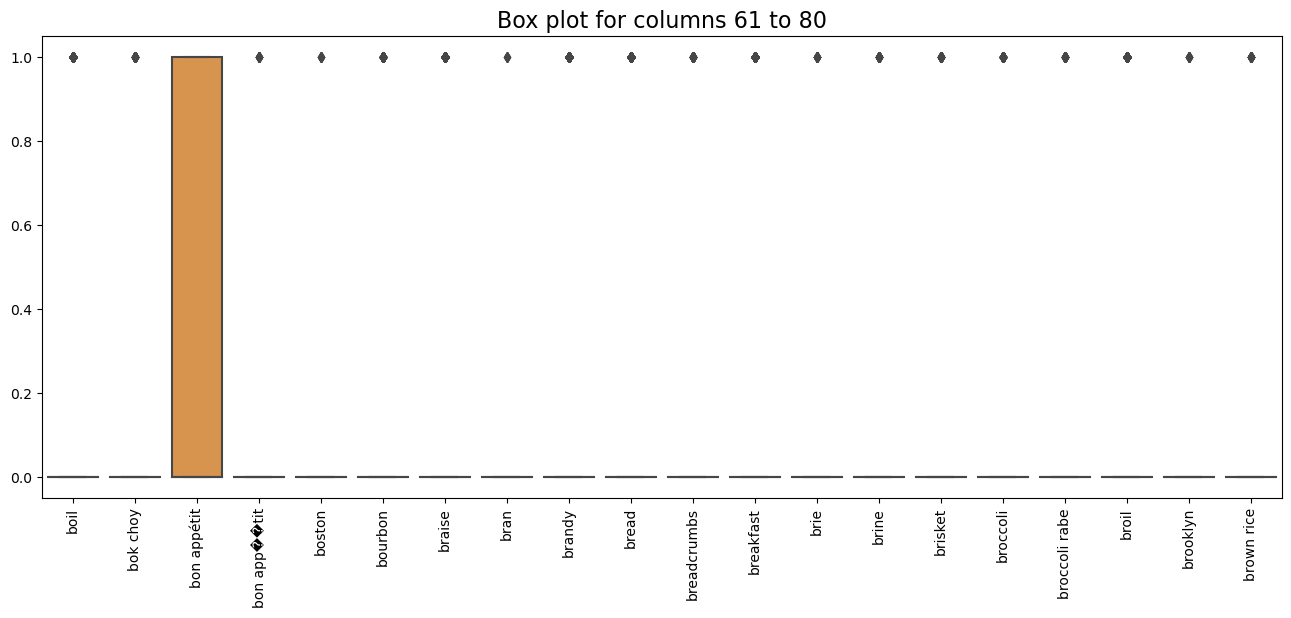

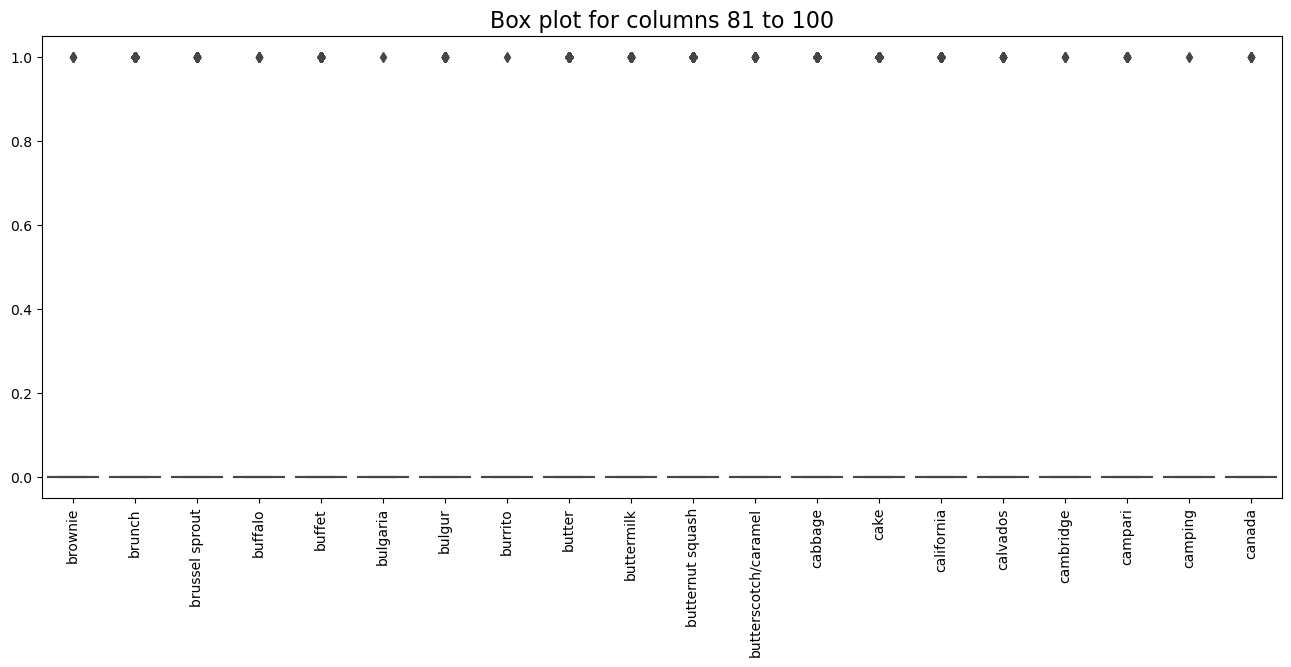

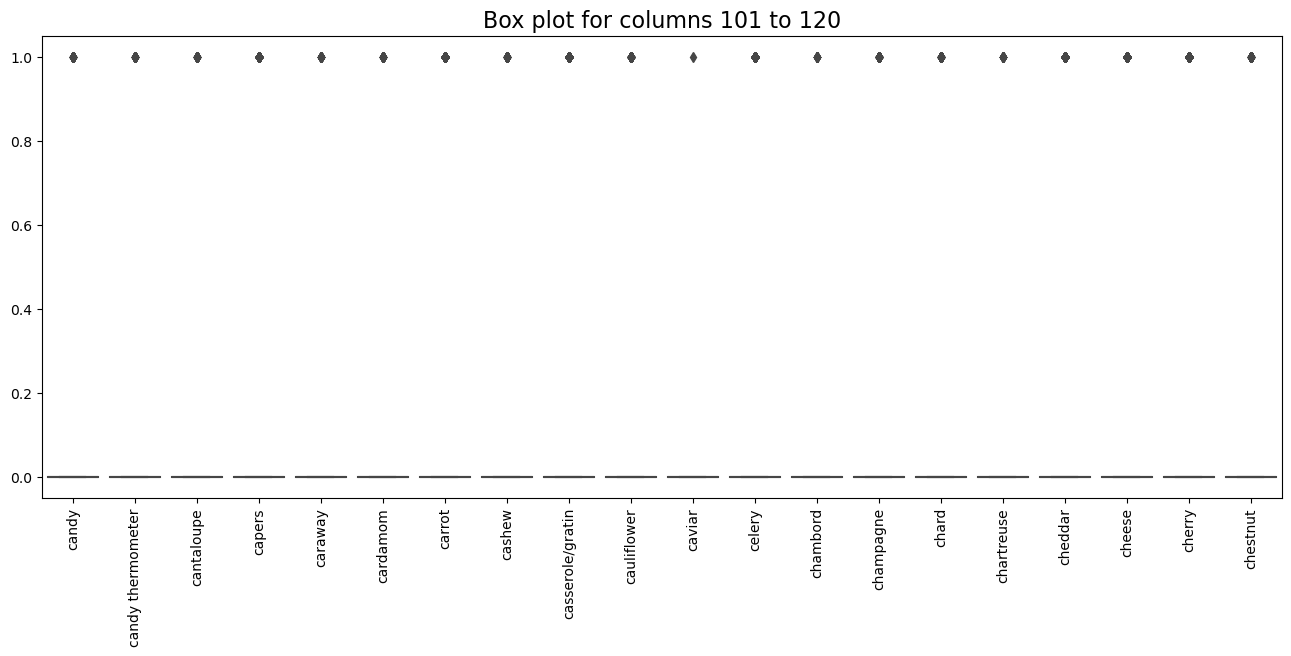

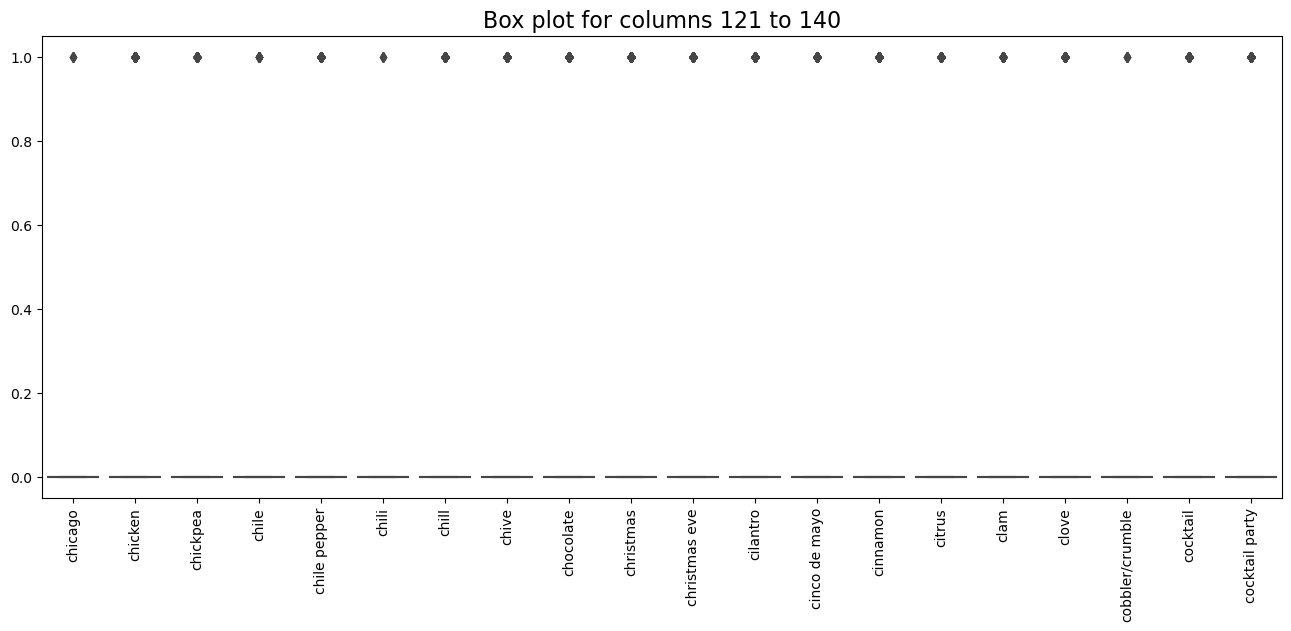

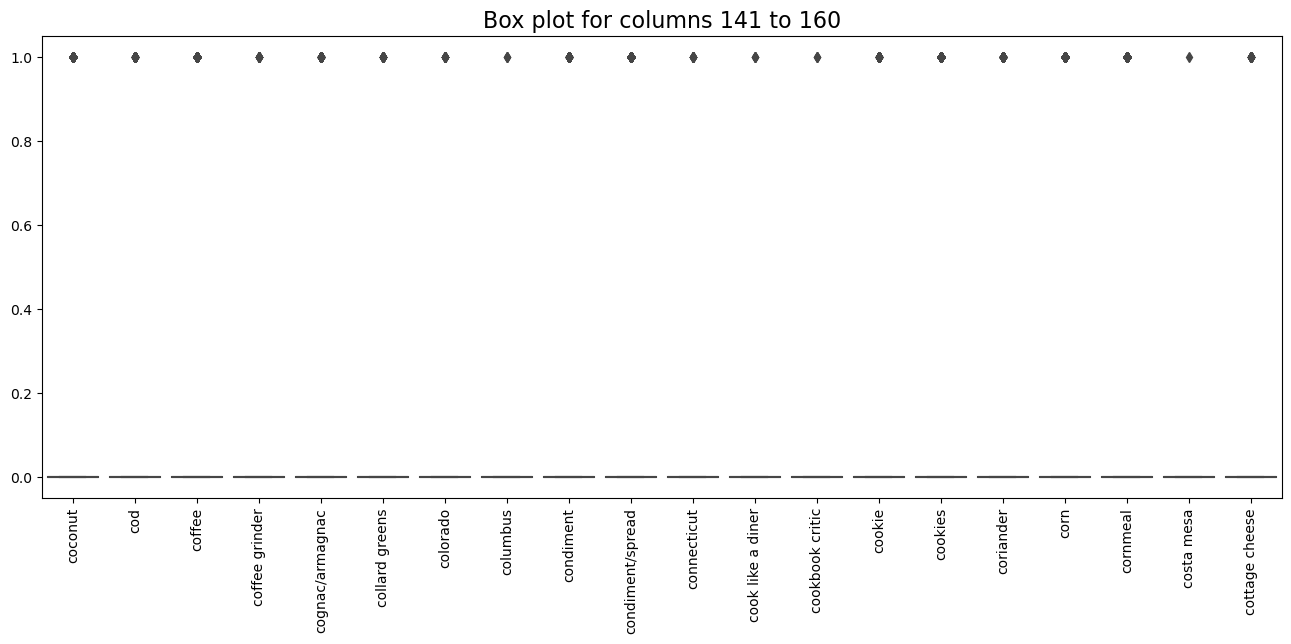

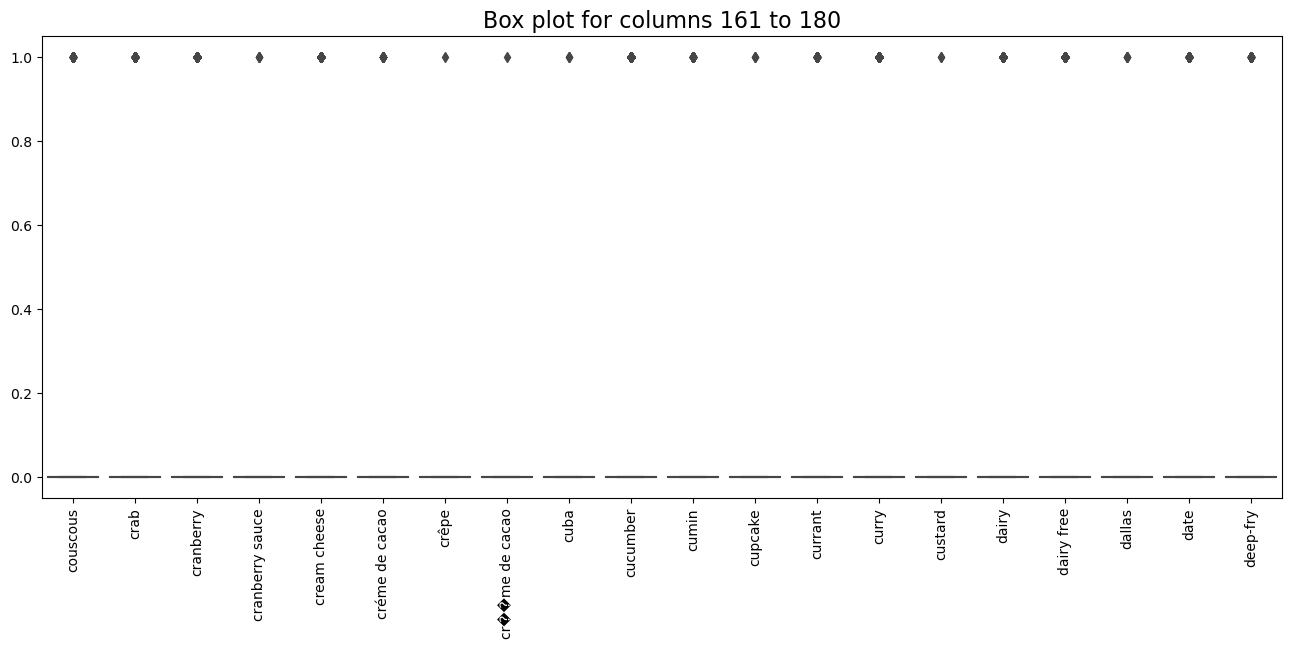

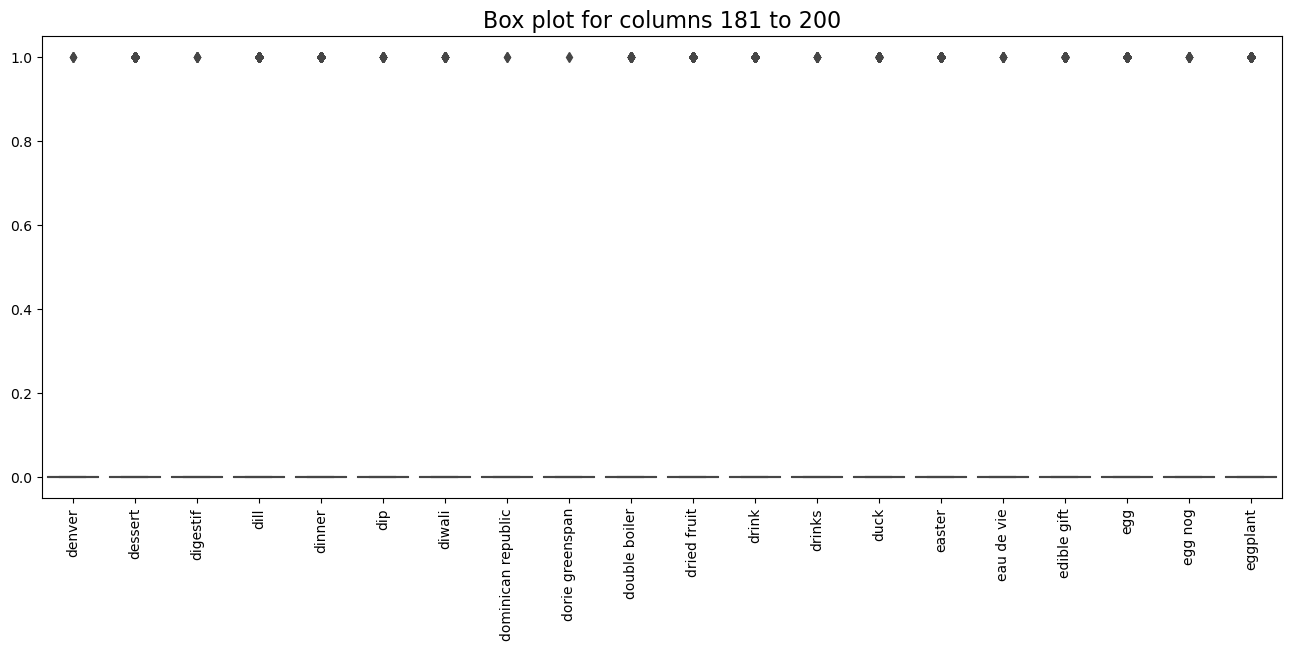

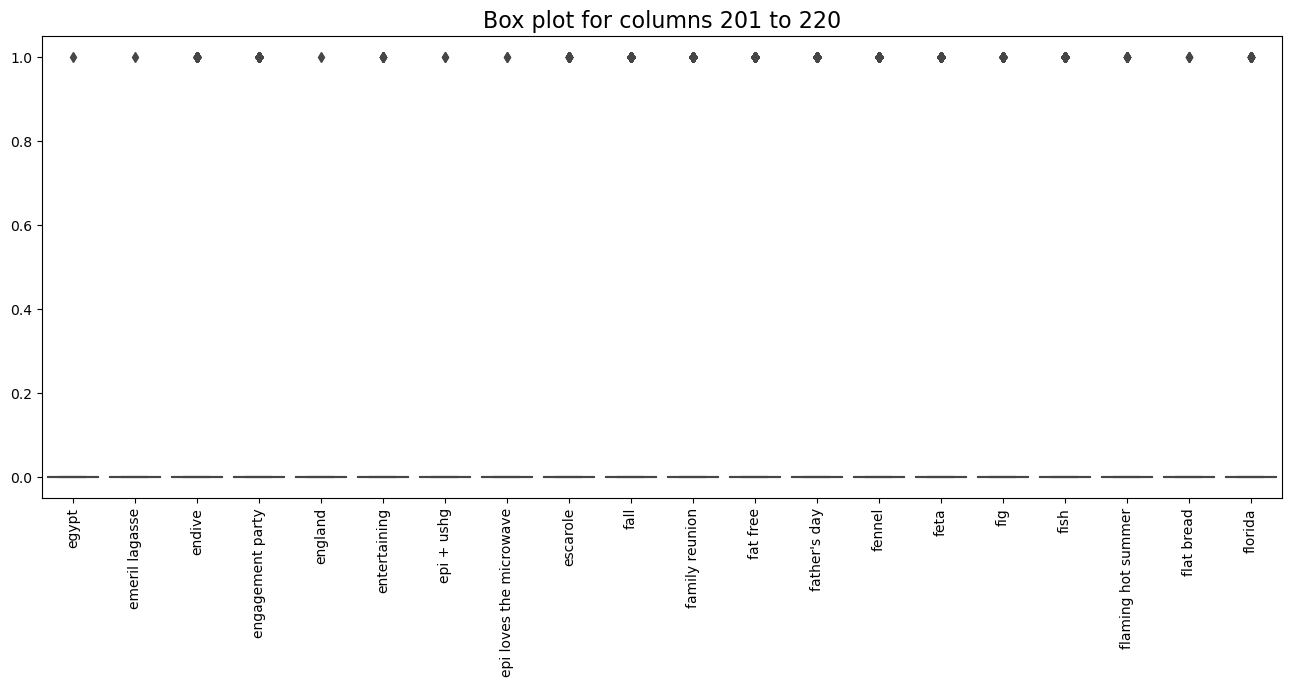

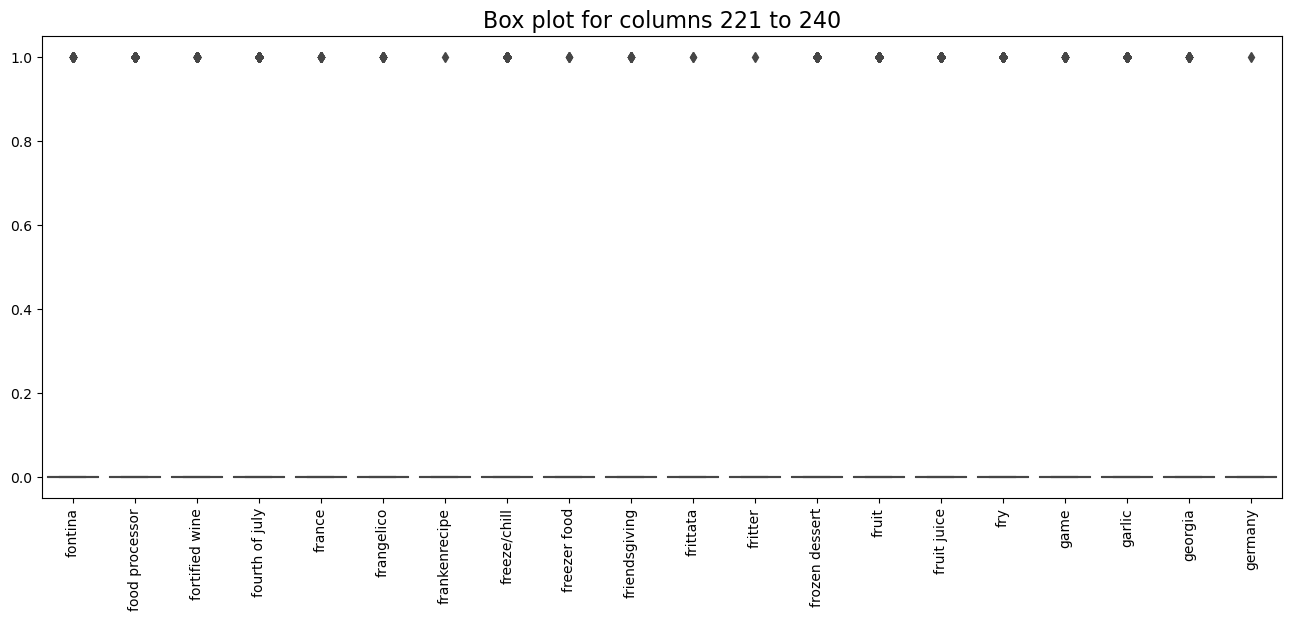

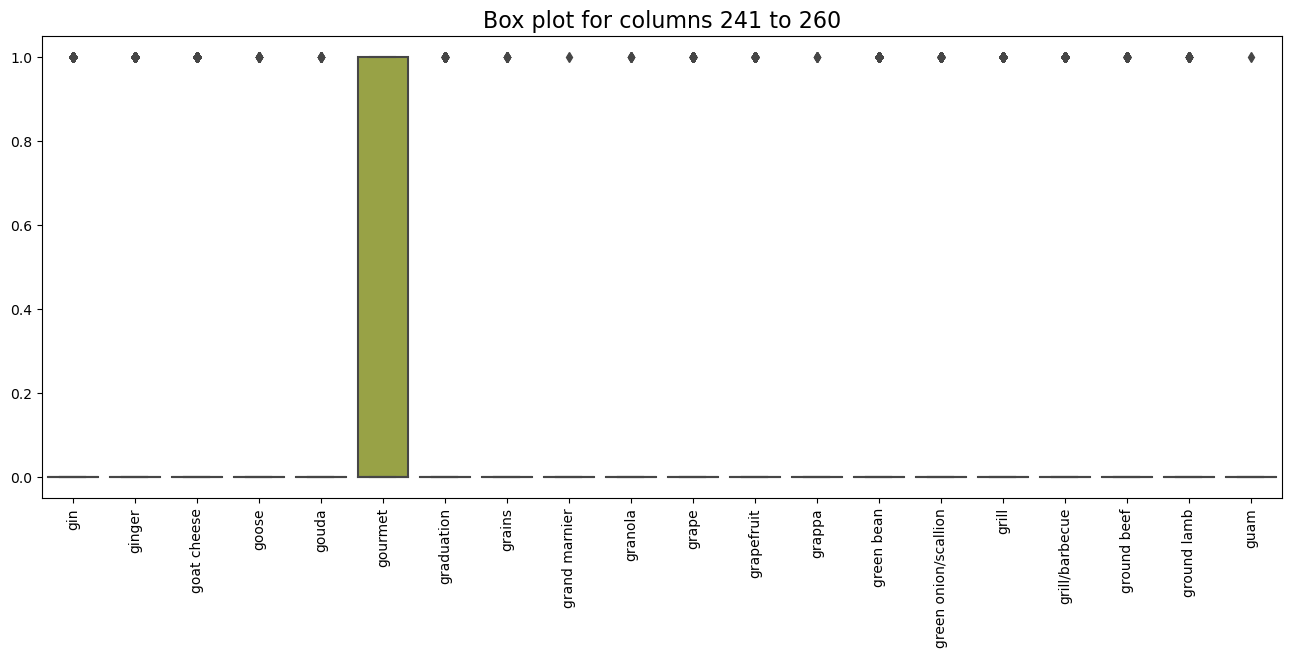

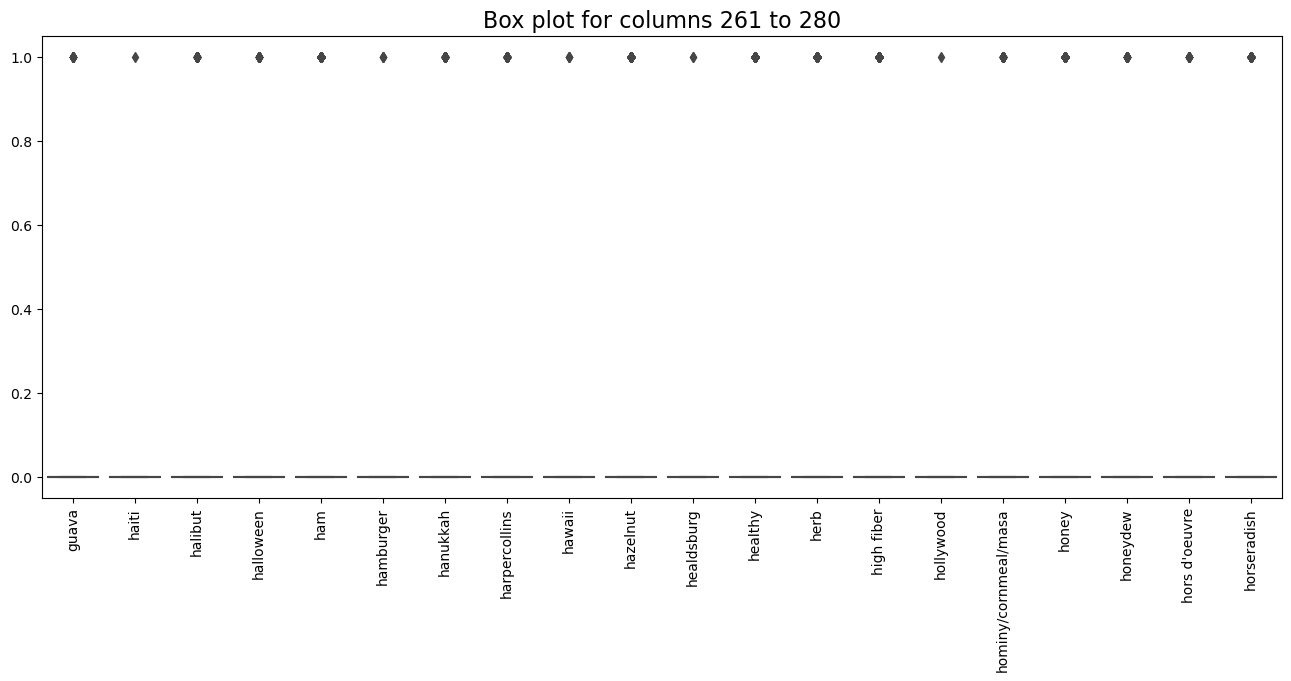

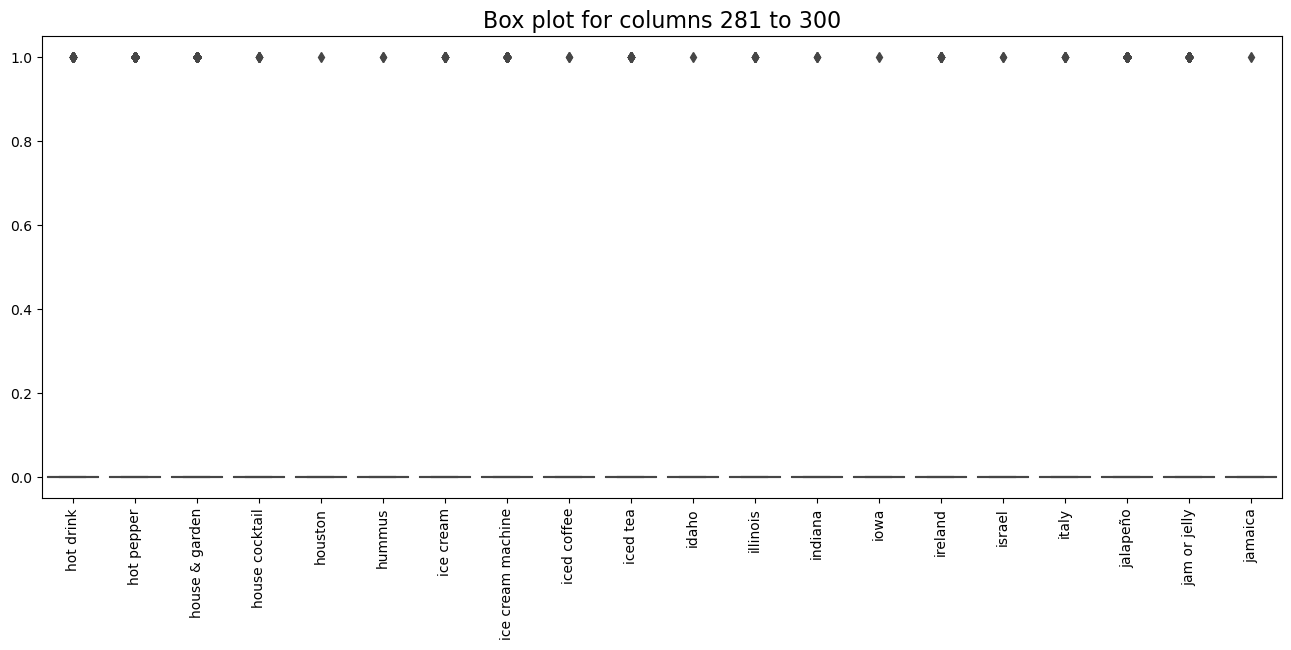

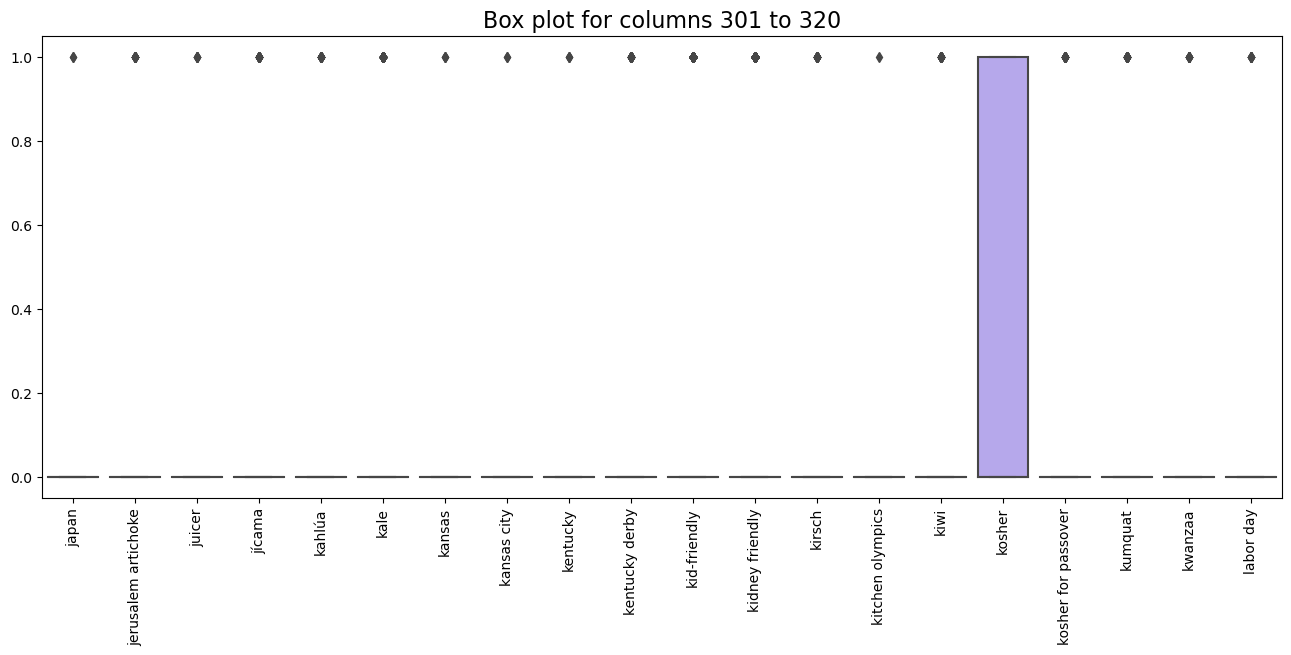

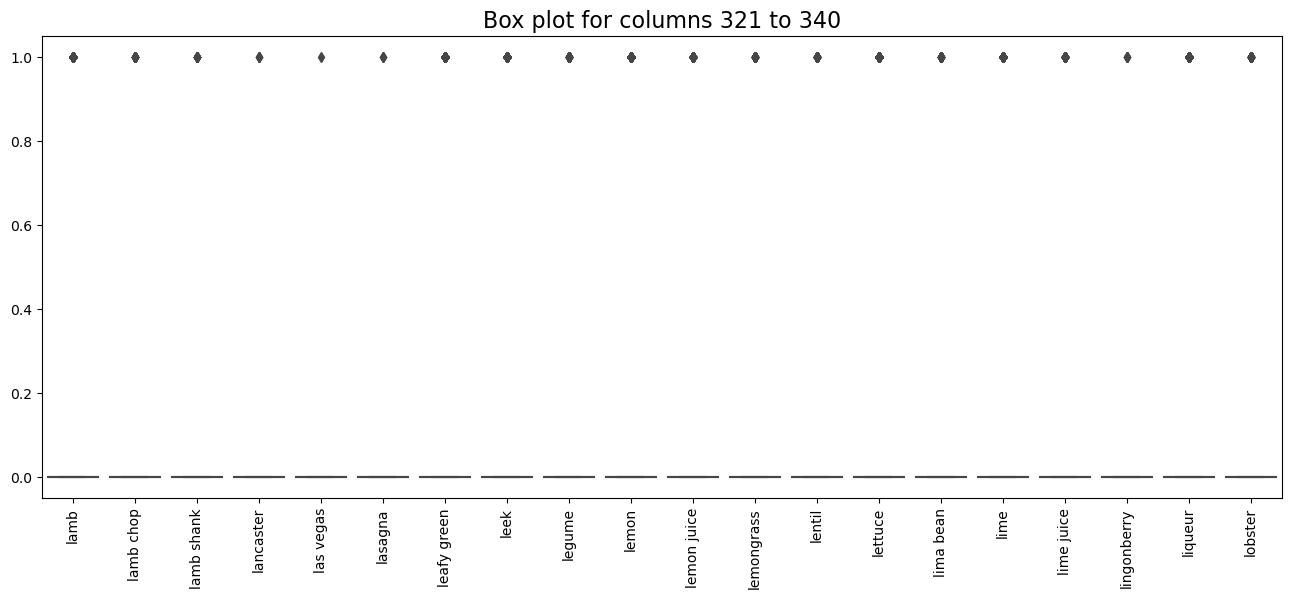

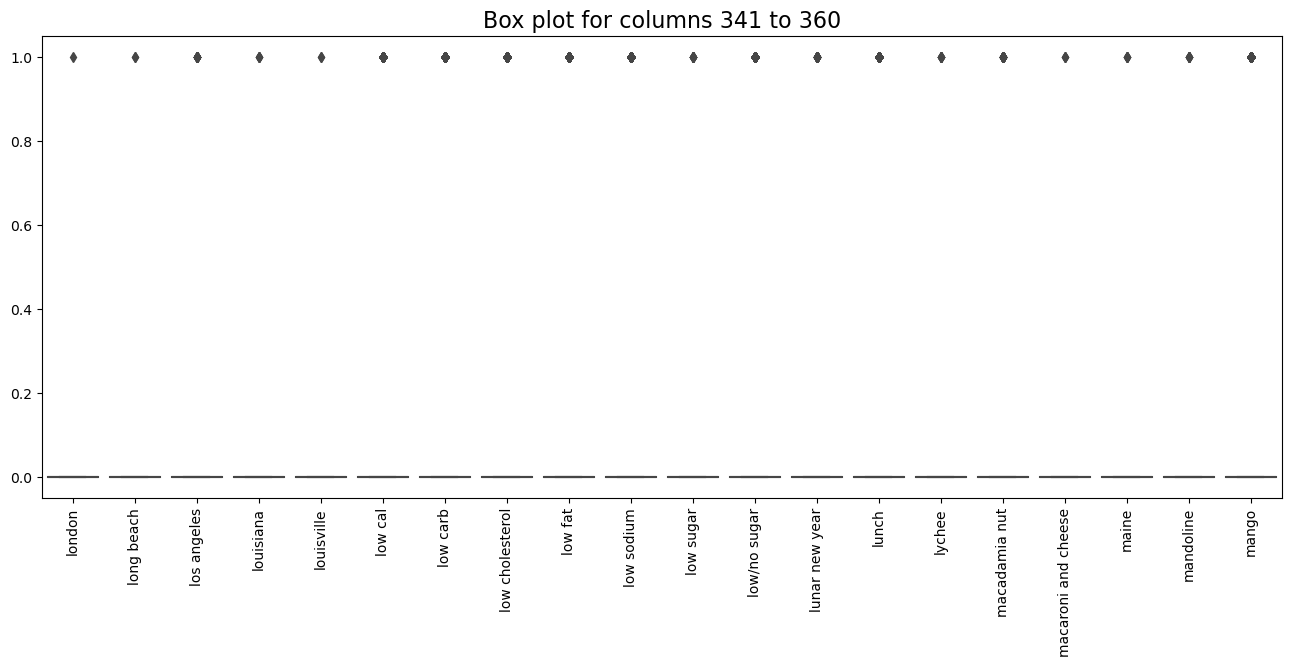

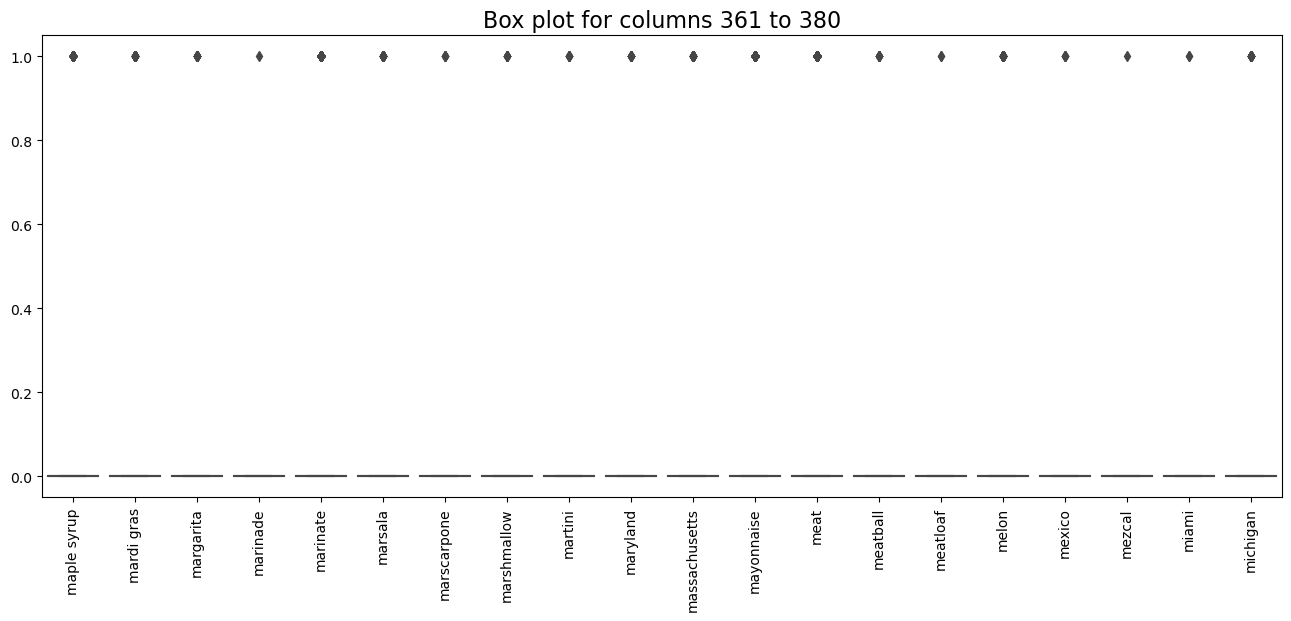

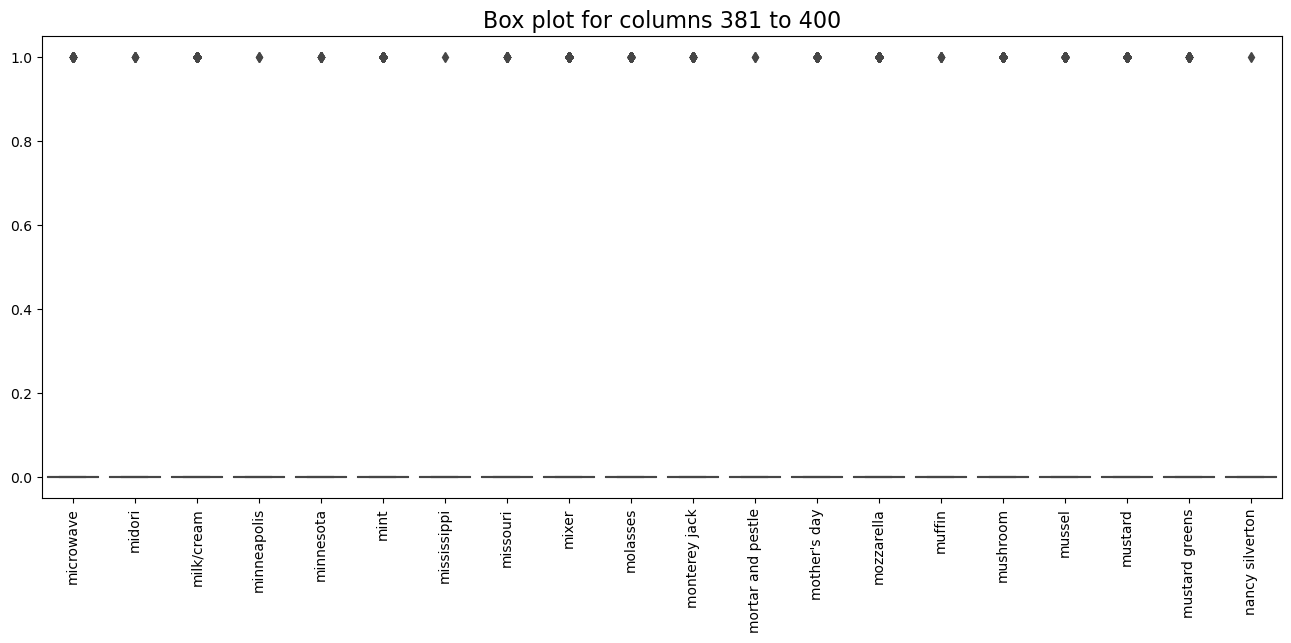

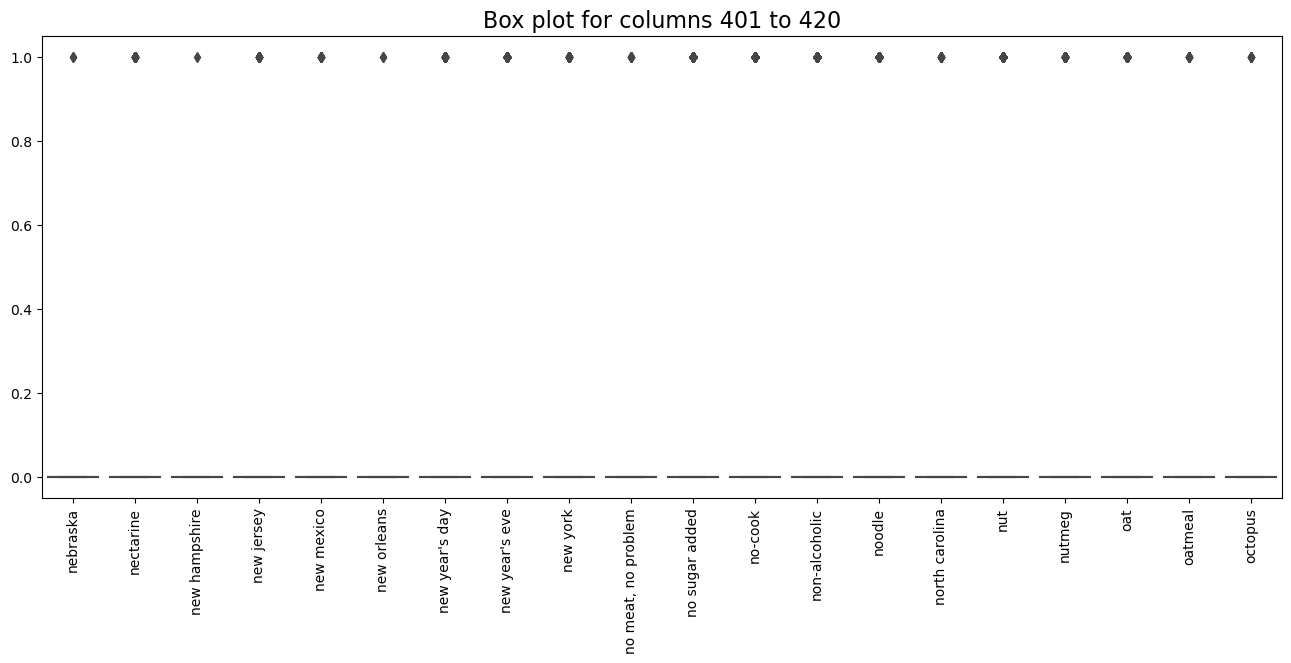

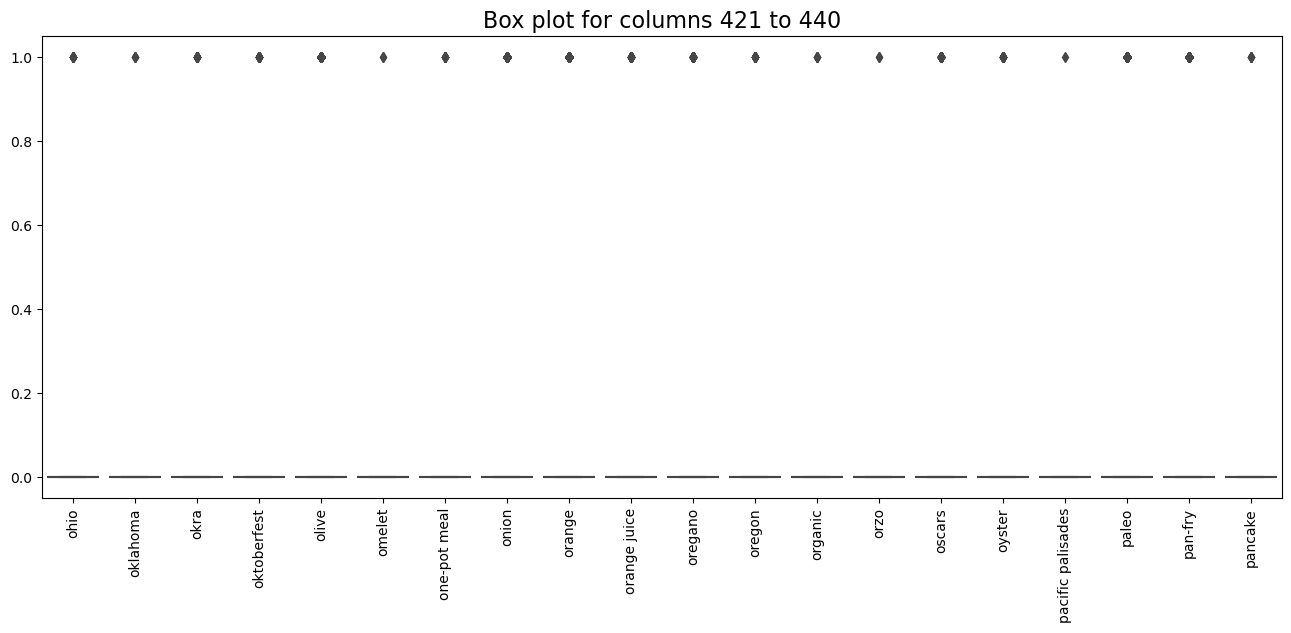

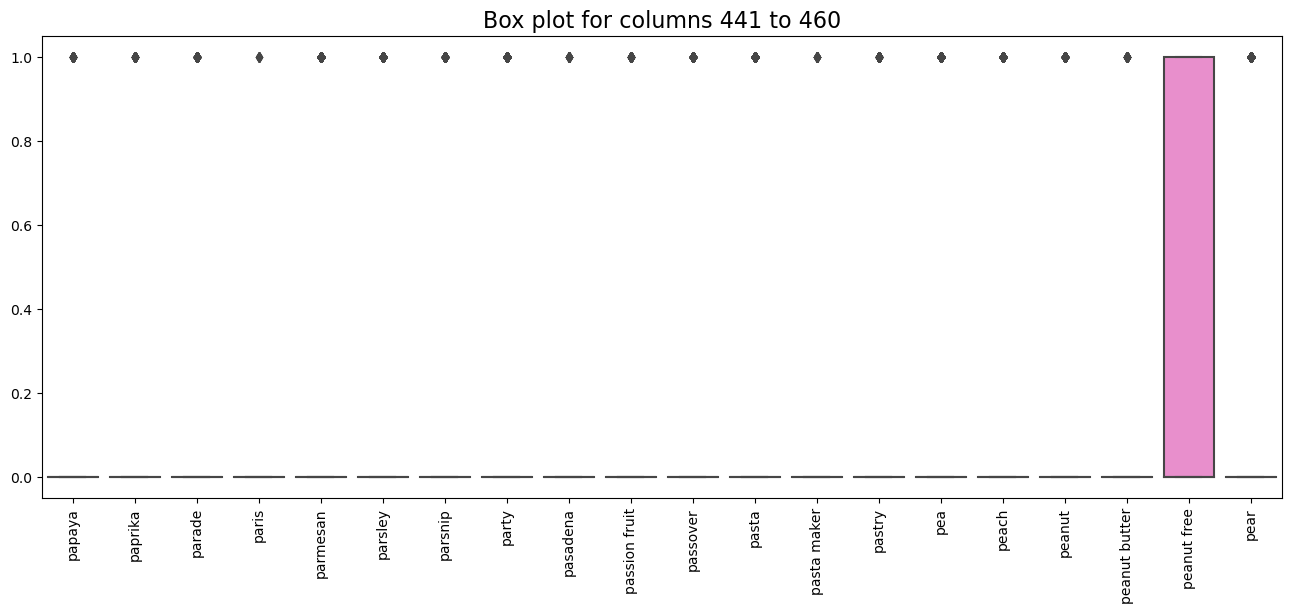

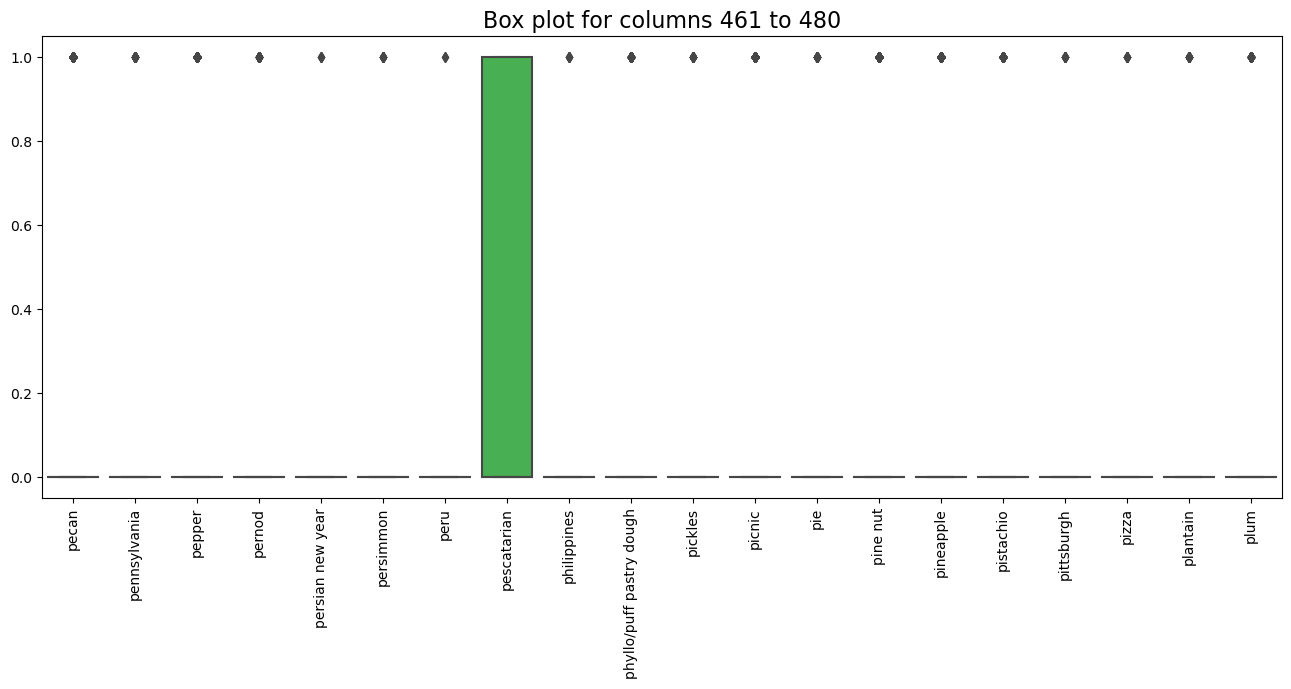

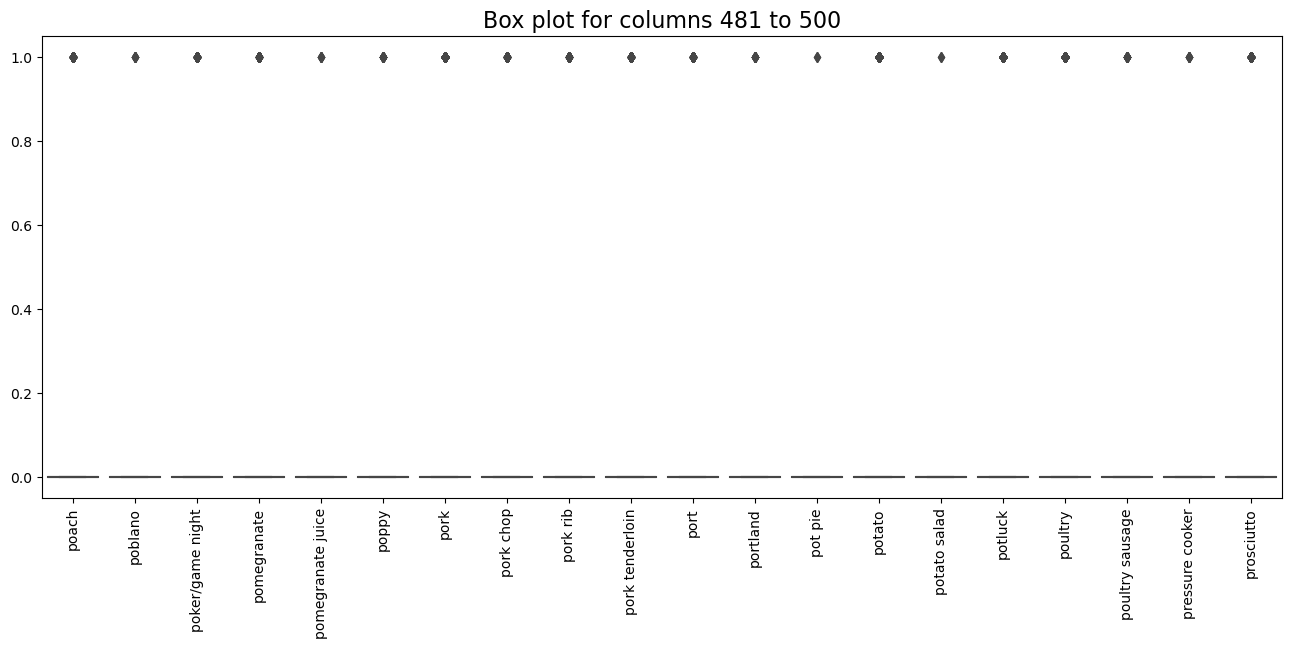

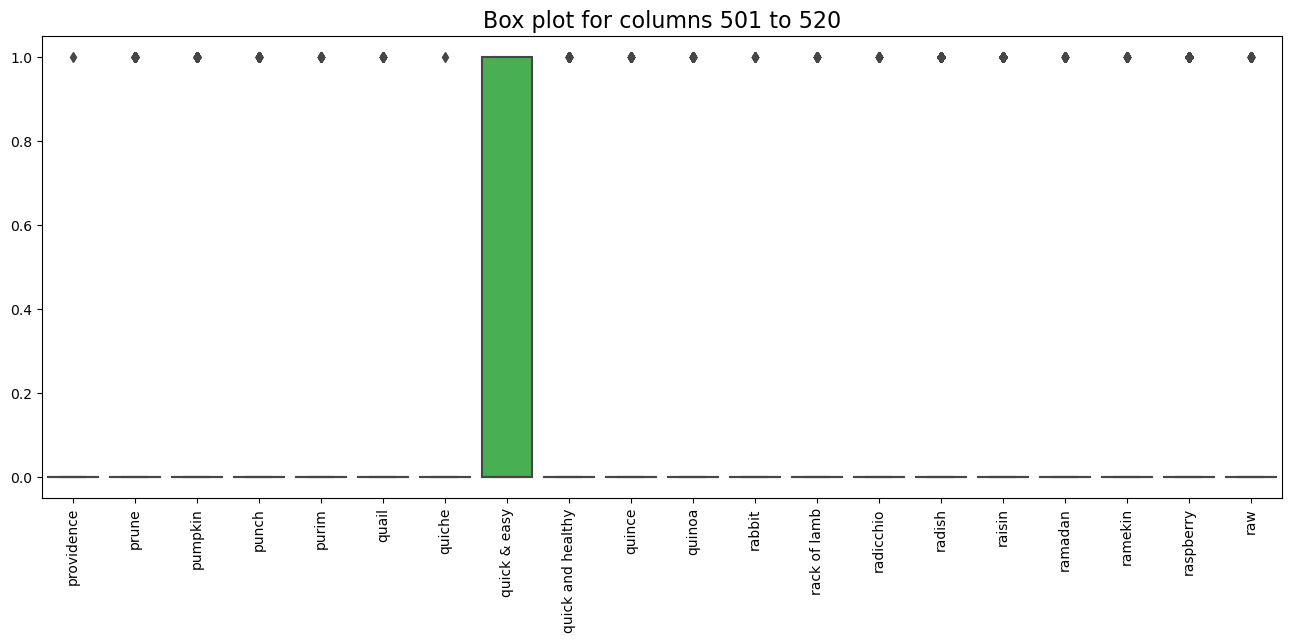

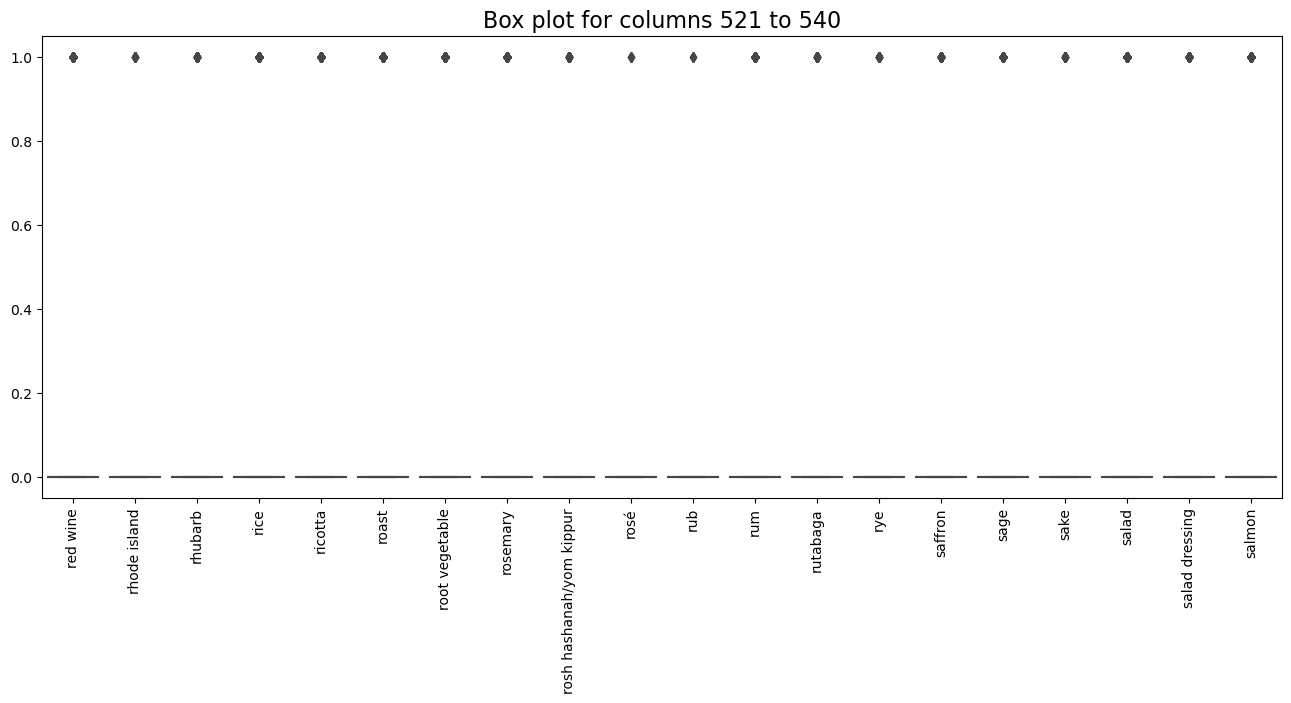

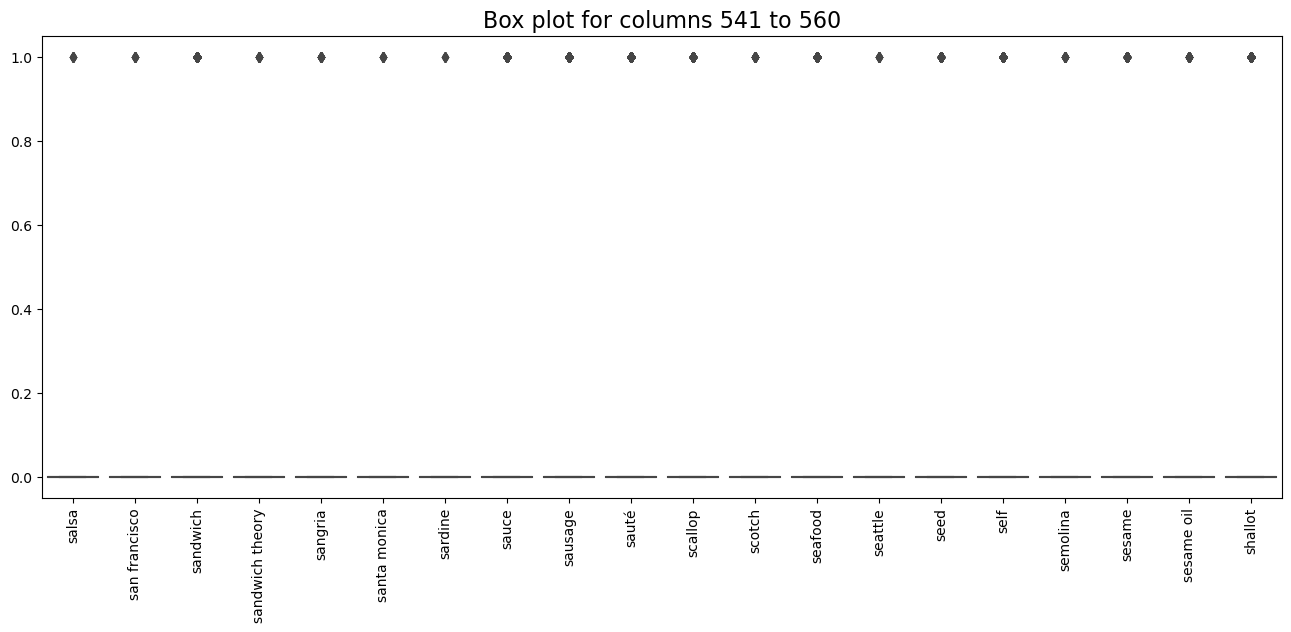

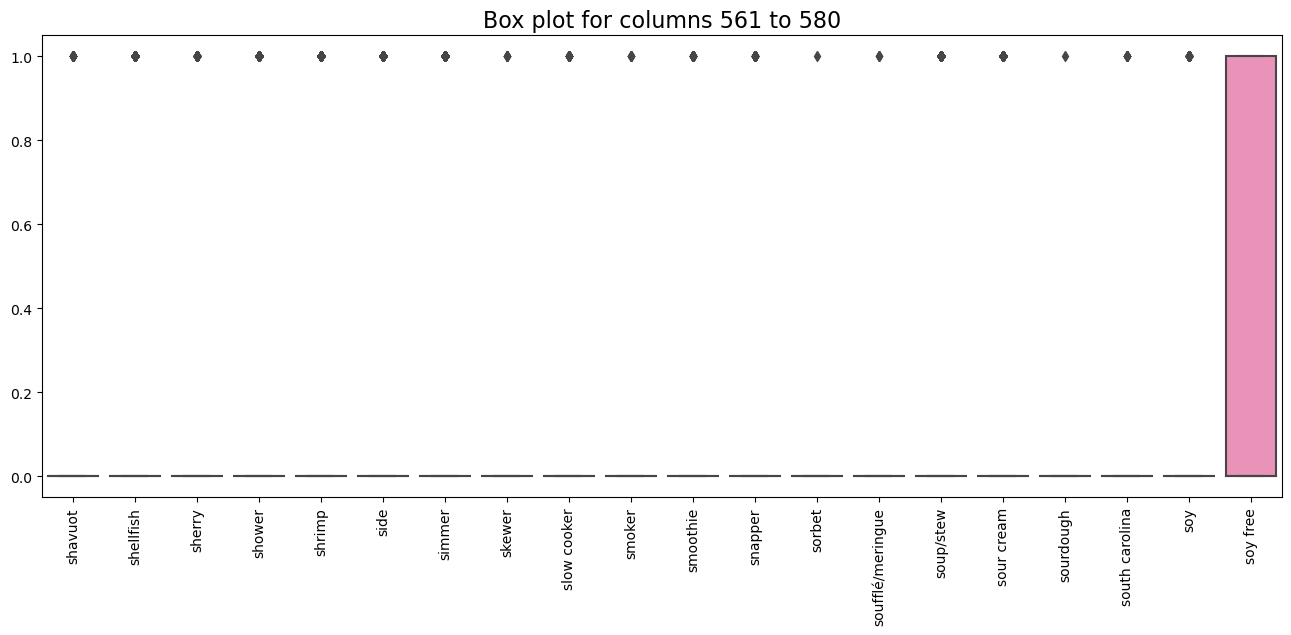

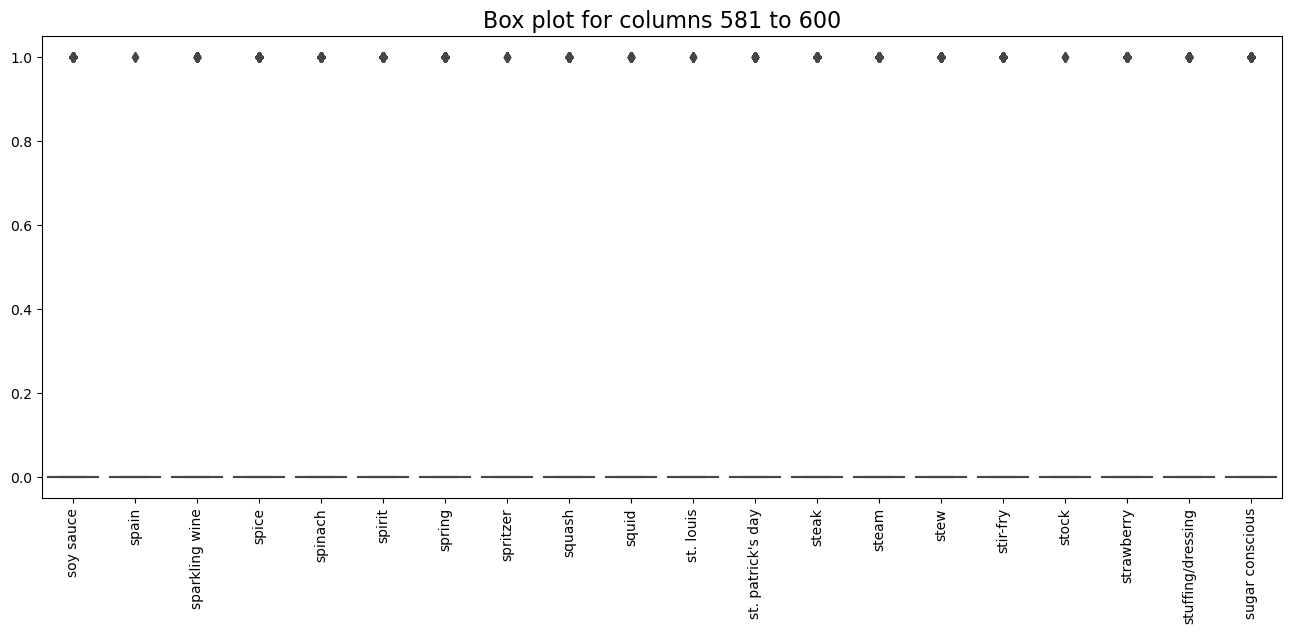

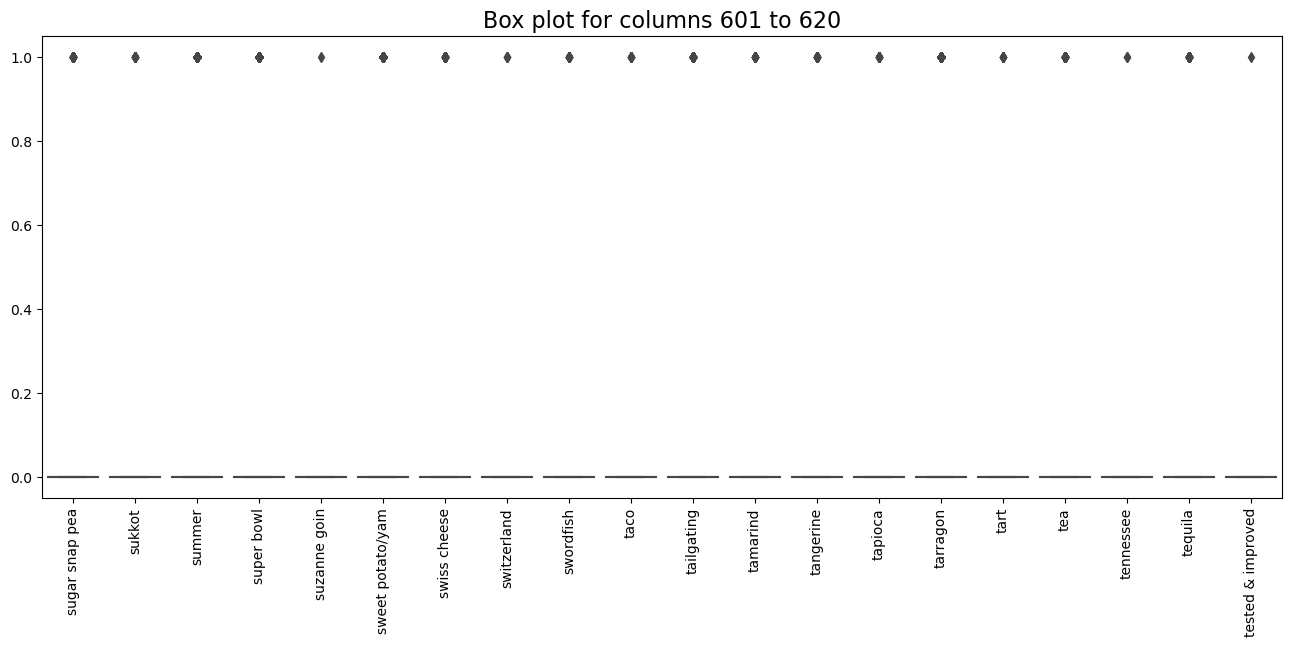

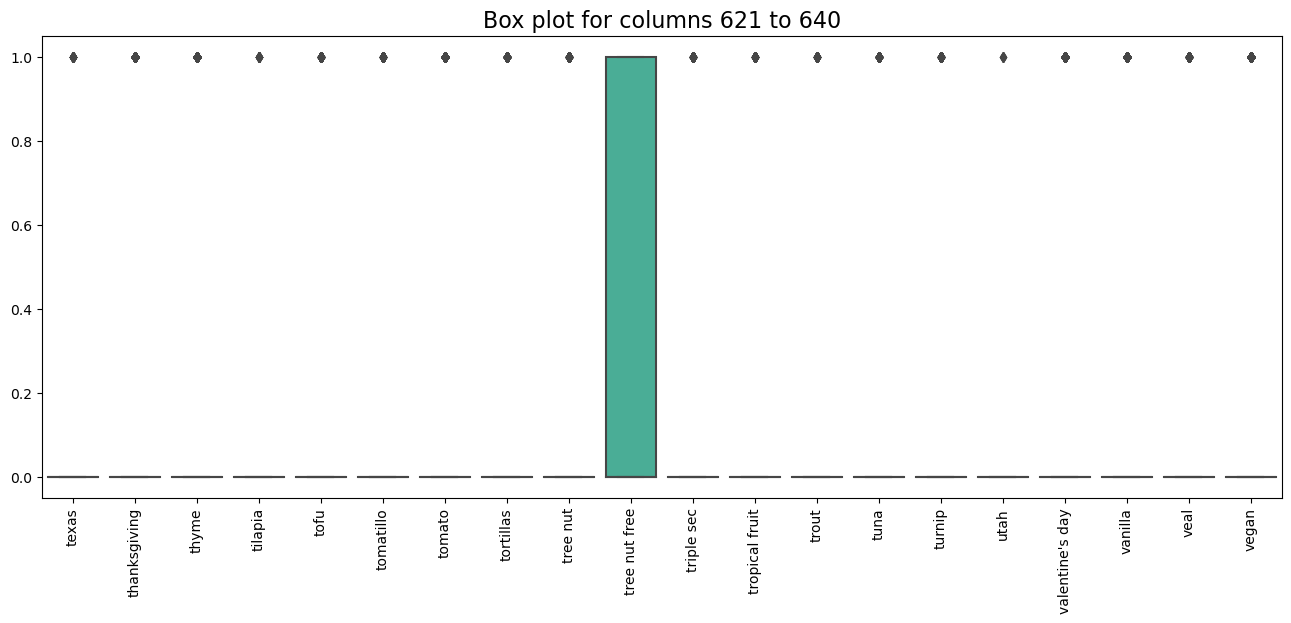

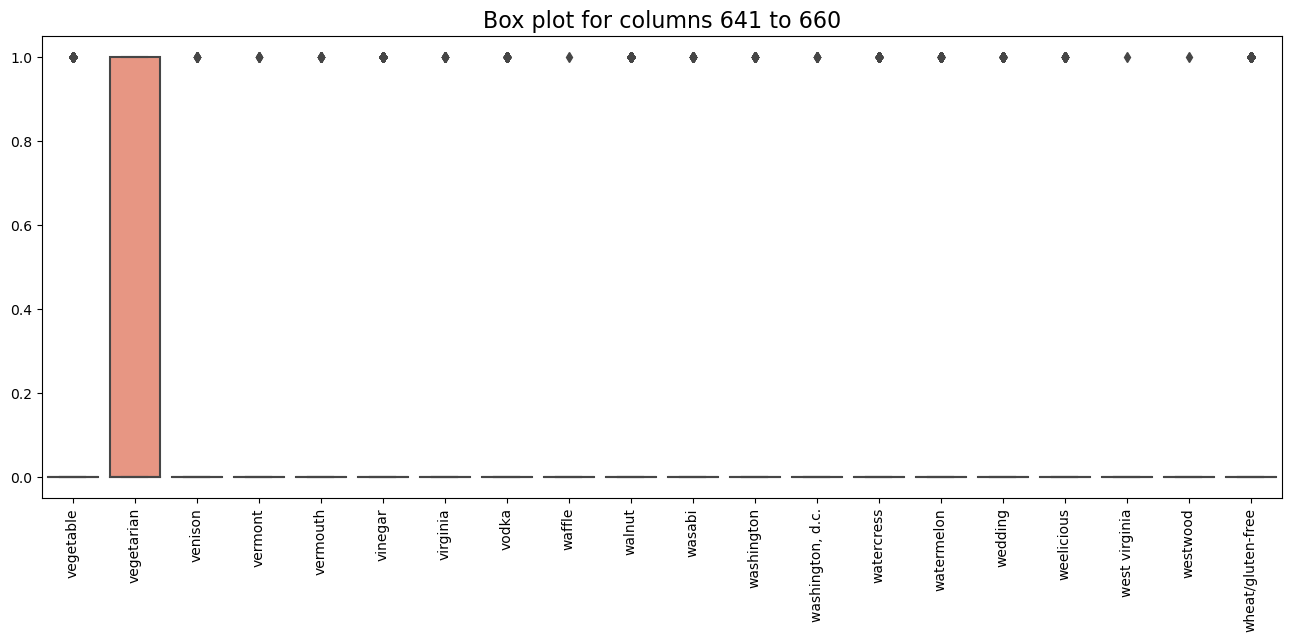

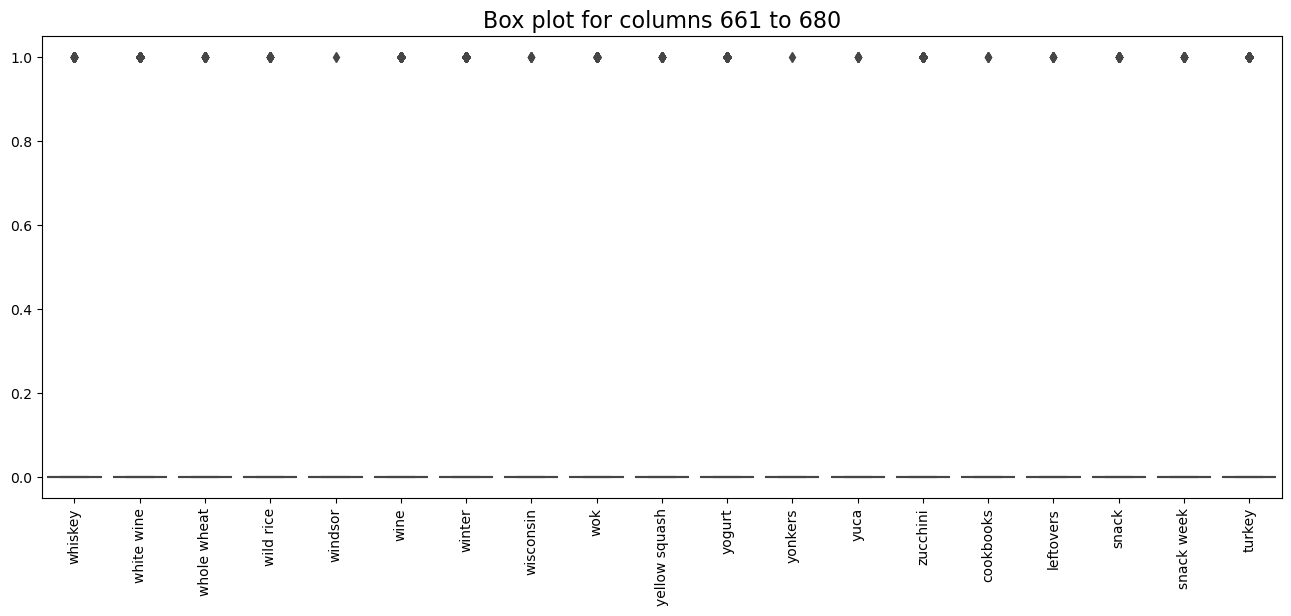

In [12]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Function to plot boxplots in chunks
def plot_boxplots_in_chunks(df, columns, chunk_size=20):
    num_chunks = len(columns) // chunk_size + 1
    for i in range(num_chunks):
        chunk = columns[i*chunk_size:(i+1)*chunk_size]
        if len(chunk) == 0: 
            break
        
        plt.figure(figsize=(16, 6))
        sns.boxplot(data=df[chunk])
        plt.title(f'Box plot for columns {i*chunk_size+1} to {(i+1)*chunk_size}', fontsize=16)
        plt.xticks(rotation=90)
        plt.show()

# Plot the boxplots in chunks of 20 columns
plot_boxplots_in_chunks(df, numeric_columns, chunk_size=20)

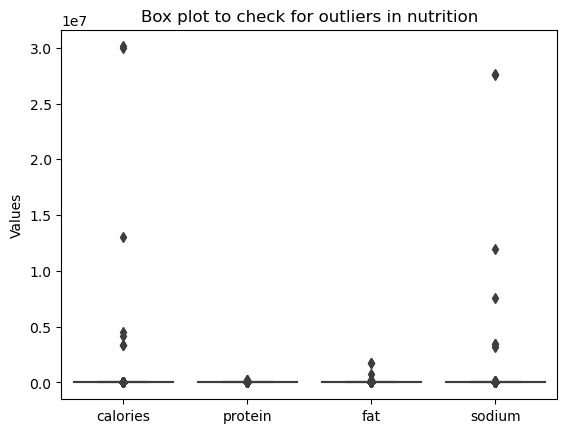

In [13]:
# Plot box plots for 'calories', 'protein', 'fat', and 'sodium' columns
sns.boxplot(data = df[['calories', 'protein', 'fat', 'sodium']])

plt.title('Box plot to check for outliers in nutrition', fontsize=12)
plt.ylabel('Values')
plt.show()

In [14]:
# Calculate Q1, Q3, and IQR for the specified columns
Q1 = df[['calories', 'protein', 'fat', 'sodium']].quantile(0.25)
Q3 = df[['calories', 'protein', 'fat', 'sodium']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a mask to filter out the outliers
mask = ~((df[['calories', 'protein', 'fat', 'sodium']] < lower_bound) | 
          (df[['calories', 'protein', 'fat', 'sodium']] > upper_bound))


df= df[mask.all(axis=1)]

#sns.boxplot(data= df[['calories', 'protein', 'fat', 'sodium']])
#plt.title('Box plot after handling outliers in nutrition columns', fontsize=16)
#plt.ylabel('Values')
#plt.show()

# EDA
### Univariate, bivariate & Multivariate Analysis

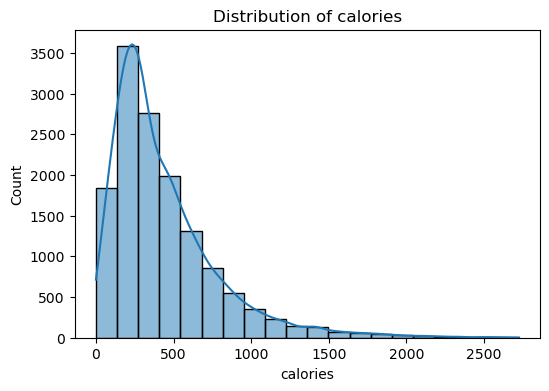

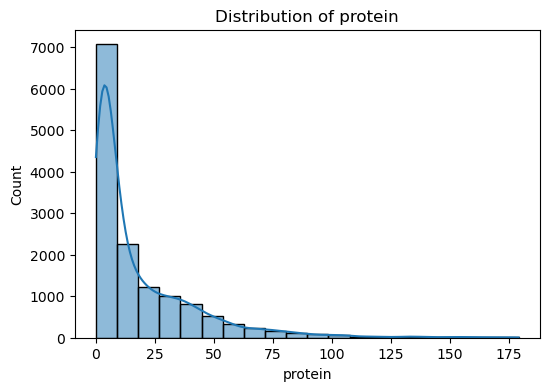

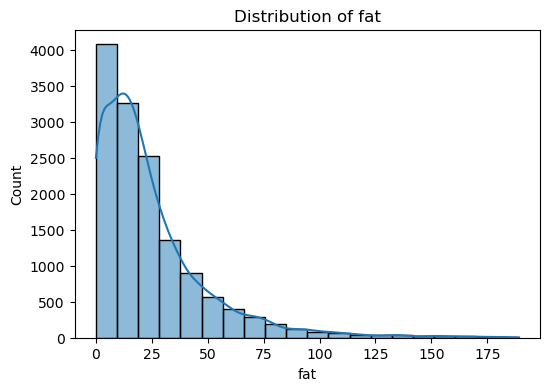

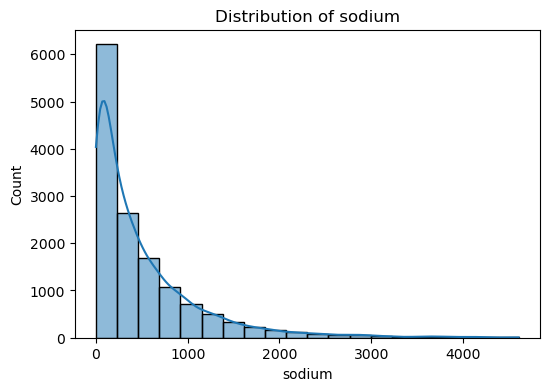

In [16]:
# Visualizing distribution of numerical columns
numerical_cols = ['calories', 'protein', 'fat', 'sodium']  

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

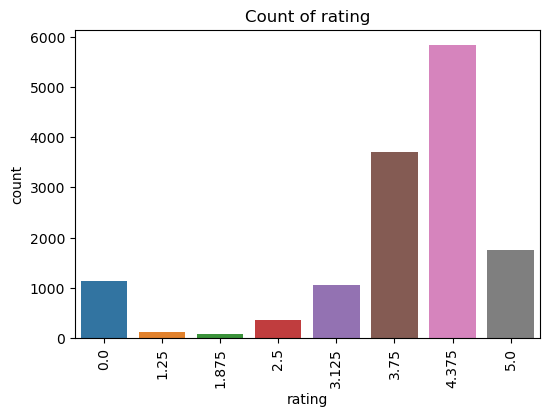

In [17]:
# Bar plot for categorical columns
categorical_cols = ['rating']  

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
    plt.show()

#### Most used Ingreadients wrt High rating

In [19]:
# Define what a "high rating" is (e.g., greater than or equal to 3.5)
high_rating_threshold = 3.5


highly_rated_recipes = df[df['rating'] >= high_rating_threshold]

# Extract ingredient columns (columns starting from the 6th one, after 'sodium')
ingredient_columns = df.columns[6:] 

ingredient_counts = highly_rated_recipes[ingredient_columns].sum().sort_values(ascending=False)

top_ingredients = ingredient_counts.head(10)  

print(top_ingredients)

bon appétit      5706.0
peanut free      4955.0
soy free         4791.0
tree nut free    4124.0
gourmet          4074.0
vegetarian       3941.0
kosher           3610.0
pescatarian      3524.0
quick & easy     3078.0
bake             2884.0
dtype: float64


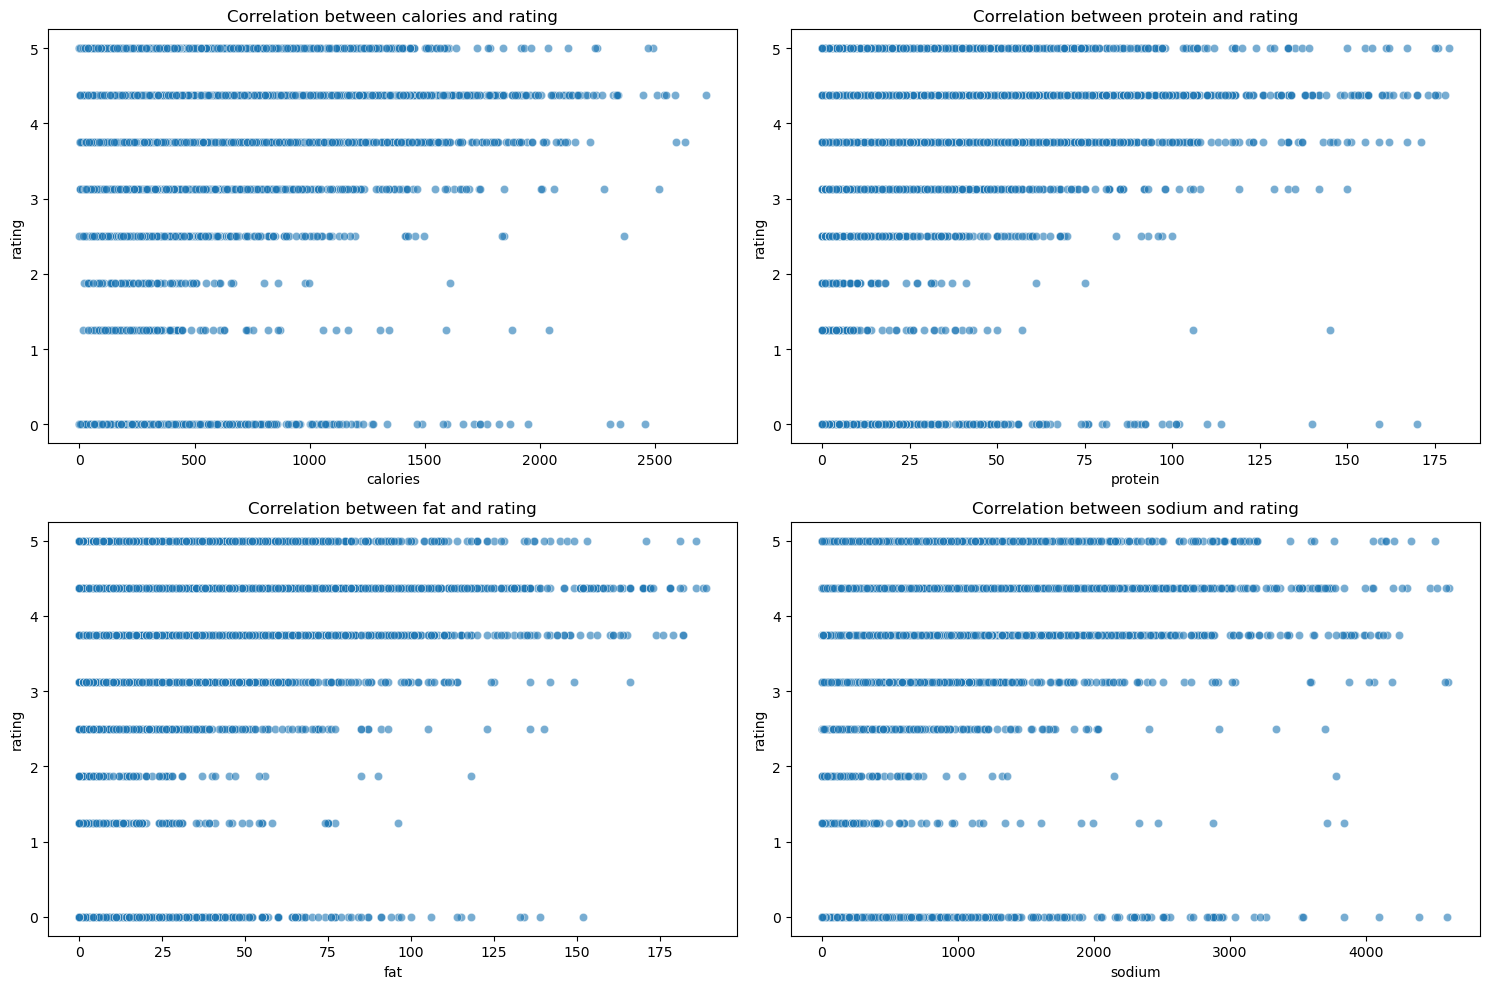

Correlation between calories and rating: 0.13
Correlation between protein and rating: 0.12
Correlation between fat and rating: 0.14
Correlation between sodium and rating: 0.08


In [20]:
# Nutritional columns to analyze
nutritional_columns = ['calories', 'protein', 'fat', 'sodium']
ratings_column = 'rating'  

plt.figure(figsize=(15, 10))
for i, column in enumerate(nutritional_columns):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(data=df, x=column, y=df['rating'], alpha=0.6)
    plt.title(f'Correlation between {column} and {ratings_column}')
    plt.xlabel(column)
    plt.ylabel(ratings_column)
plt.tight_layout()
plt.show()

# Calculate and print correlation coefficients
for column in nutritional_columns:
    correlation = df[column].corr(df[ratings_column])
    print(f'Correlation between {column} and {ratings_column}: {correlation:.2f}')

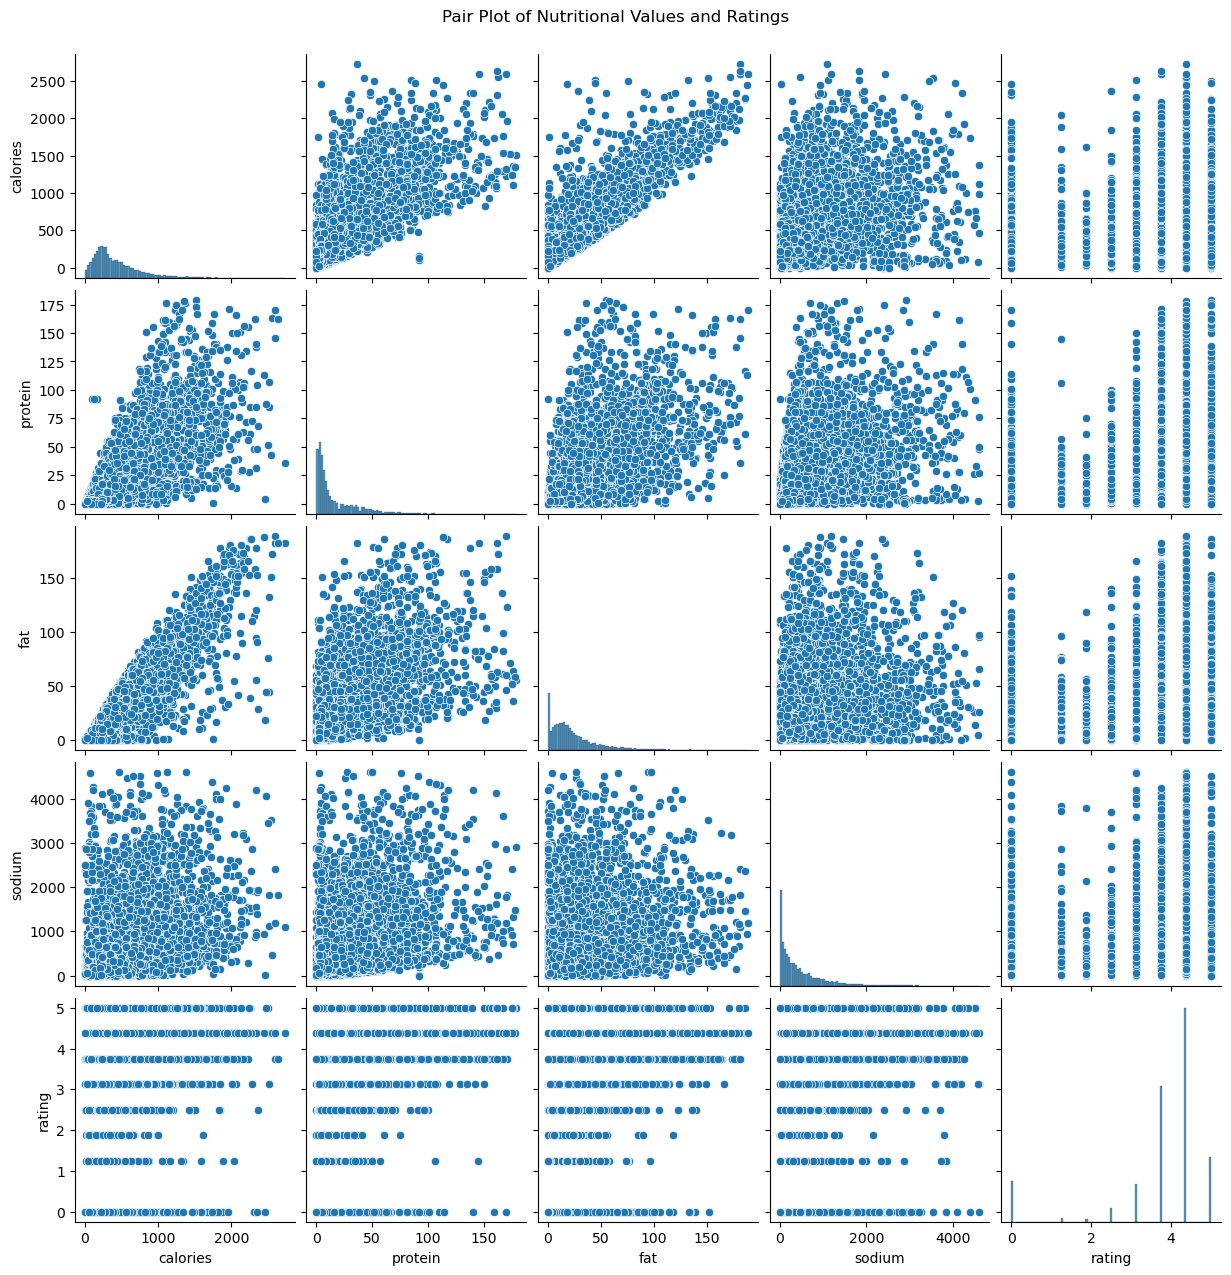

In [21]:
# Pair plot 
sns.pairplot(df[['calories', 'protein', 'fat', 'sodium', 'rating']])
plt.suptitle('Pair Plot of Nutritional Values and Ratings', y=1.02)
plt.show()

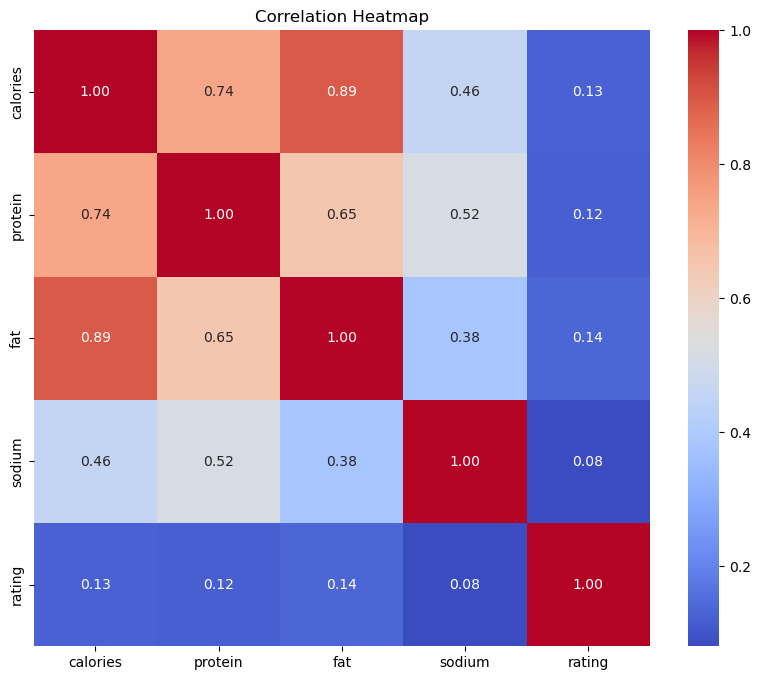

In [22]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
correlation_matrix = df[['calories', 'protein', 'fat', 'sodium', 'rating']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

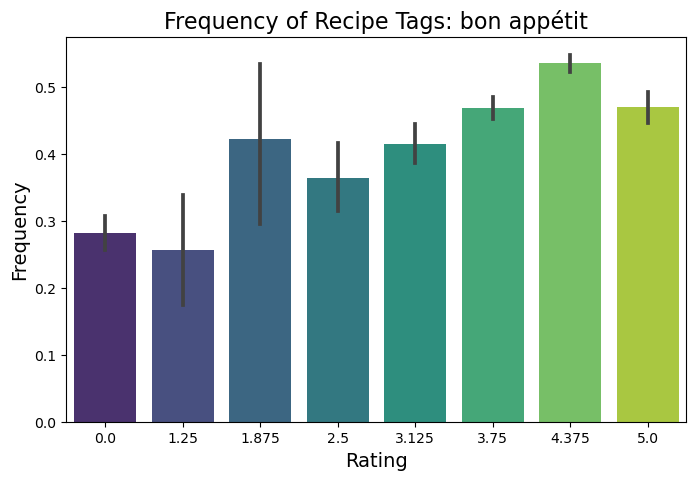

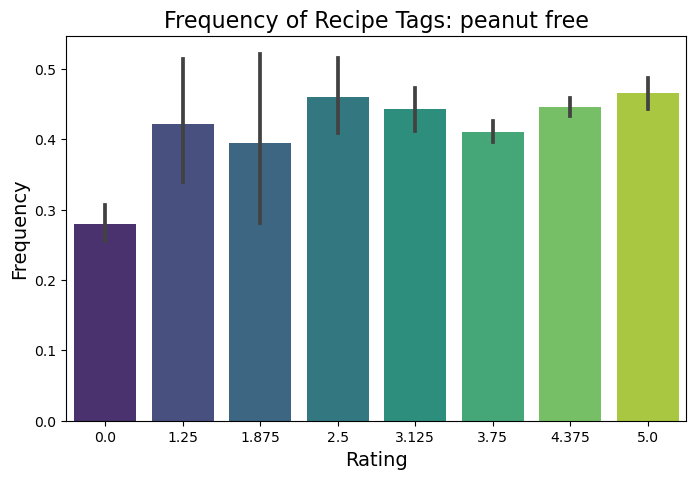

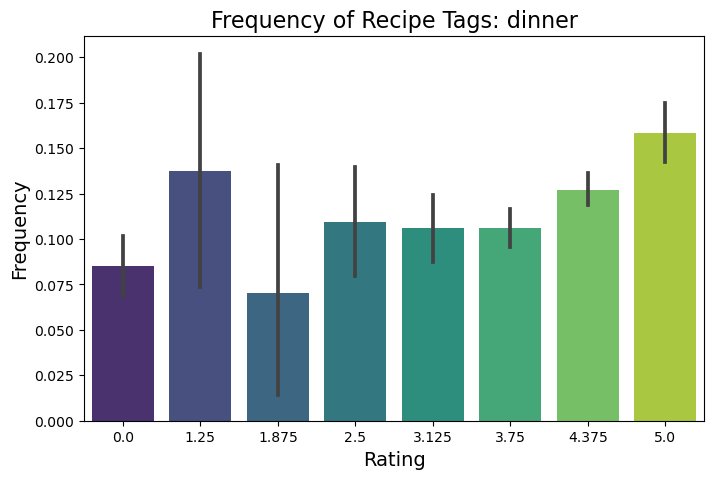

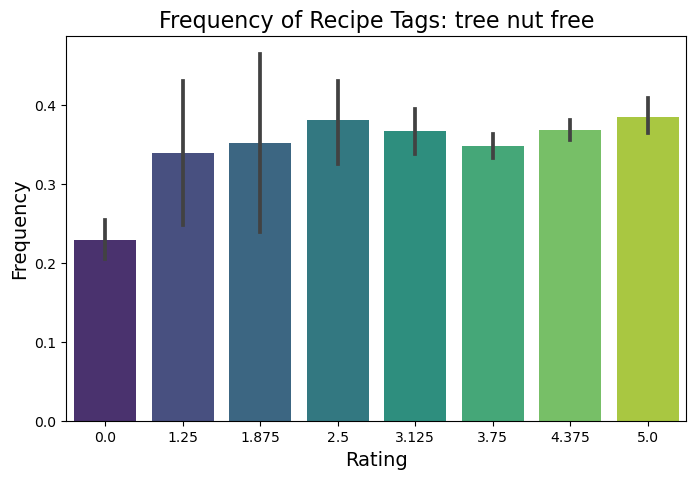

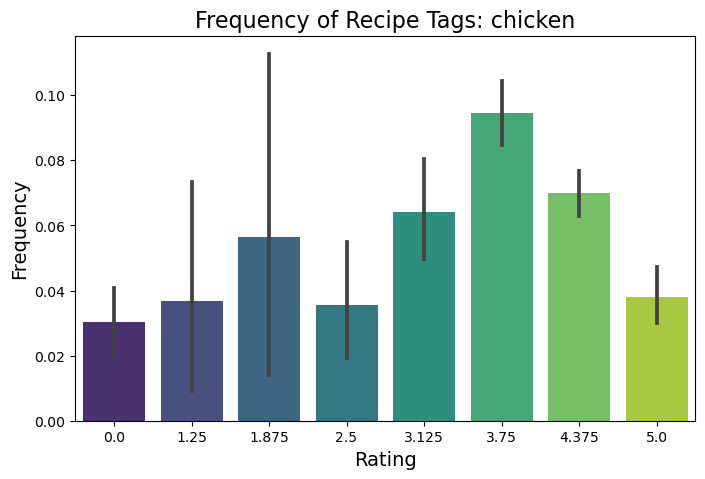

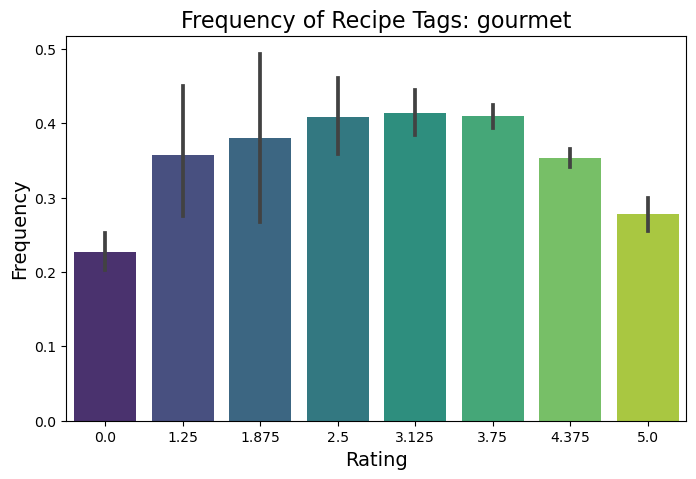

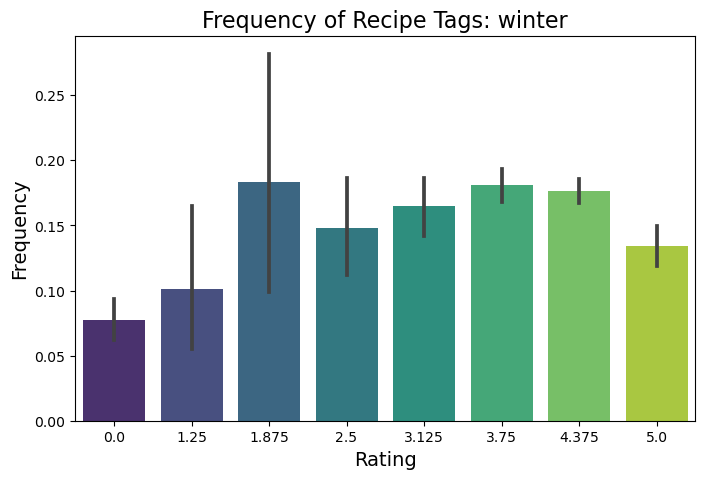

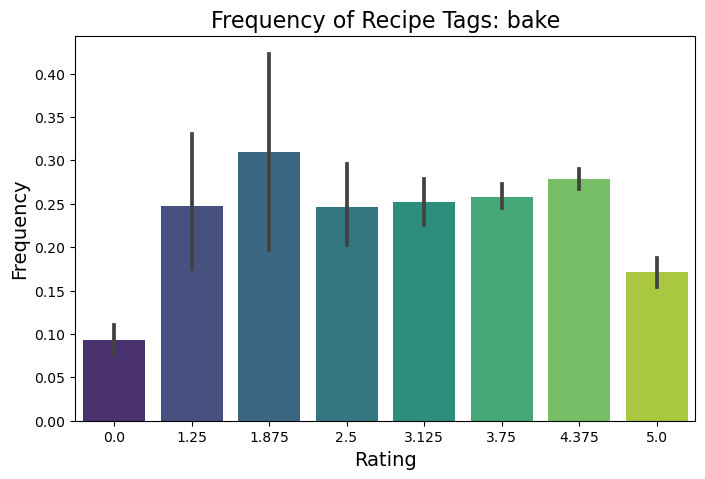

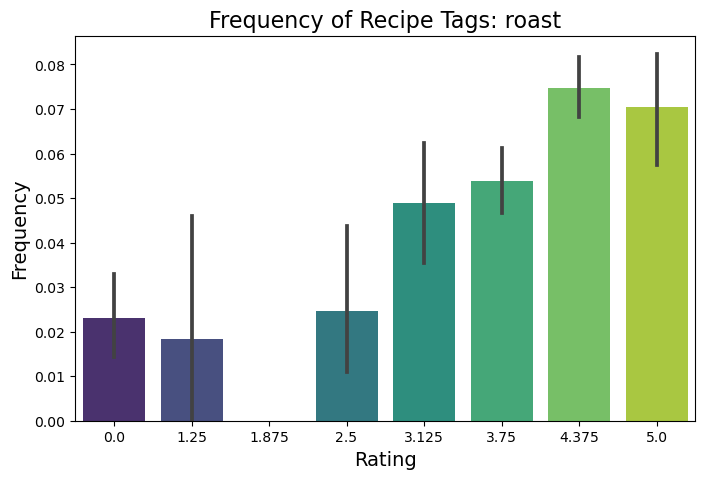

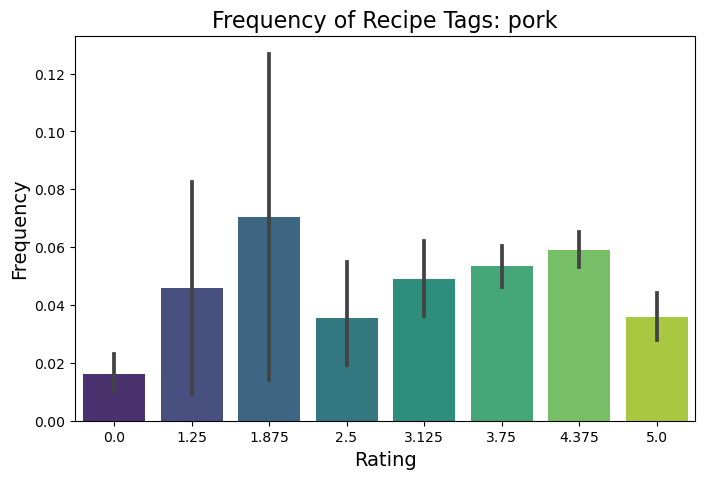

In [23]:

tags = ['bon appétit', 'peanut free', 'dinner', 'tree nut free', 'chicken', 'gourmet', 'winter', 'bake', 'roast', 'pork']


for tag in tags:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='rating', y=tag, data=df, palette='viridis')
    plt.title(f'Frequency of Recipe Tags: {tag}', fontsize=16)
    plt.xlabel('Rating', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

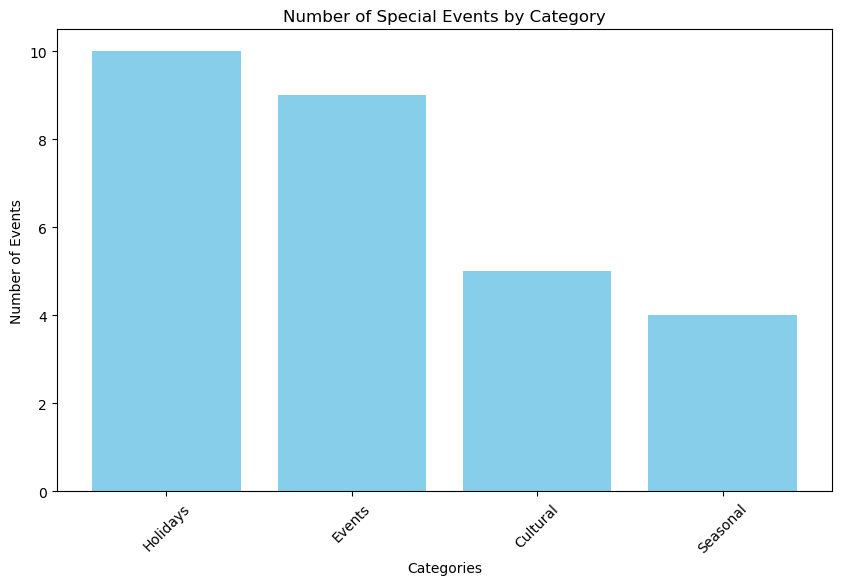

In [24]:
special_events = {
    'Holidays': ['Christmas', 'Easter', 'Halloween', 'Hanukkah', 'Kwanzaa', 'Lunar New Year', "Mother's Day", 'Passover', 'Thanksgiving', "Valentine's Day"],
    'Events': ['birthday', 'anniversary', 'cocktail party', 'dinner party', 'engagement party', 'graduation', 'wedding', 'picnic', 'tailgating'],
    'Cultural': ['Chinese New Year', 'Diwali', 'Mexican Independence Day', 'Oktoberfest', "St. Patrick's Day"],
    'Seasonal': ['fall', 'spring', 'summer', 'winter']
}

event_counts = {category: len(events) for category, events in special_events.items()}


categories = list(event_counts.keys())
counts = list(event_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Number of Events')
plt.title('Number of Special Events by Category')
plt.xticks(rotation=45)
plt.show()

                                             title cuisine
0                  Lentil, Apple, and Turkey Wrap    Other
1      Boudin Blanc Terrine with Red Onion Confit    Other
2                    Potato and Fennel Soup Hodge    Other
4                        Spinach Noodle Casserole    Other
5                                   The Best Blts    Other
...                                            ...     ...
20047                              Parmesan Puffs    Other
20048              Artichoke and Parmesan Risotto    Other
20049                       Turkey Cream Puff Pie    Other
20050     Snapper on Angel Hair with Citrus Cream    Other
20051  Baked Ham with Marmalade-Horseradish Glaze    Other

[14035 rows x 2 columns]


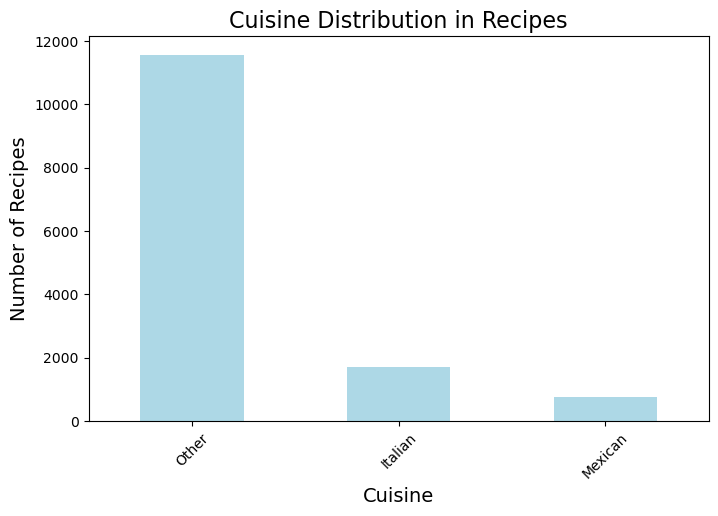

In [25]:
cuisine_keywords = {
    'Italian': ['pasta', 'tomato', 'basil', 'olive oil', 'cheese'],
    'Mexican': ['taco', 'salsa', 'corn', 'avocado', 'beans']
}

def assign_cuisine(title):
    for cuisine, keywords in cuisine_keywords.items():
        if any(keyword in title.lower() for keyword in keywords):
            return cuisine
    return 'Other'

df['cuisine'] = df['title'].apply(assign_cuisine)

print(df[['title', 'cuisine']])

cuisine_counts = df['cuisine'].value_counts()

plt.figure(figsize=(8, 5))
cuisine_counts.plot(kind='bar', color='lightblue')
plt.title('Cuisine Distribution in Recipes', fontsize=16)
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Number of Recipes', fontsize=14)
plt.xticks(rotation=45)
plt.show()

           Category  Count
2        Vegetables   3823
1            Fruits   2994
0             Dairy   2212
3  Herbs and Spices   1658
4    Nuts and Seeds    742
5            Grains    458
6           Legumes    104


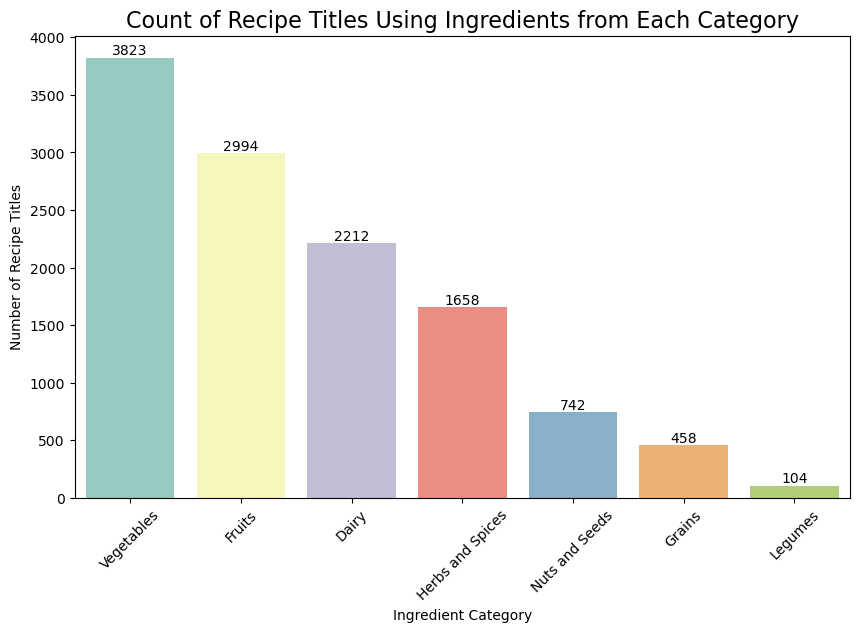

In [27]:
# Ingredient categories
ingredients = {
    'Dairy': ['milk', 'cream', 'butter', 'cheese', 'yogurt', 'sour cream', 'cottage cheese', 'cream cheese'],
    'Fruits': ['apple', 'apricot', 'banana', 'berry', 'lemon', 'lime', 'mango', 'orange', 'peach', 'pear', 'pineapple', 'plum', 'pomegranate', 'strawberry', 'tangerine', 'watermelon'],
    'Vegetables': ['asparagus', 'avocado', 'bell pepper', 'broccoli', 'carrot', 'cauliflower', 'celery', 'corn', 'cucumber', 'eggplant', 'garlic', 'kale', 'lettuce', 'mushroom', 'onion', 'potato', 'spinach', 'tomato'],
    'Herbs and Spices': ['basil', 'cilantro', 'cinnamon', 'clove', 'cumin', 'ginger', 'mint', 'nutmeg', 'oregano', 'paprika', 'rosemary', 'sage', 'thyme'],
    'Nuts and Seeds': ['almond', 'cashew', 'hazelnut', 'peanut', 'pistachio', 'sesame seed', 'walnut'],
    'Grains': ['barley', 'brown rice', 'bulgur', 'couscous', 'oats', 'quinoa', 'rice', 'rye', 'semolina'],
    'Legumes': ['chickpea', 'lentil']
}

category_count = {category: 0 for category in ingredients}

for title in df['title']:
    for category, ing_list in ingredients.items():
        for ingredient in ing_list:
            if ingredient.lower() in title.lower():
                category_count[category] += 1
                break  

category_count_df = pd.DataFrame(list(category_count.items()), columns=['Category', 'Count'])
category_count_df = category_count_df.sort_values(by='Count', ascending=False)

print(category_count_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=category_count_df, palette='Set3')

for i, count in enumerate(category_count_df['Count']):
    plt.text(i, count + 0.05, f'{count}', ha='center', va='bottom')


plt.title('Count of Recipe Titles Using Ingredients from Each Category', fontsize=16)
plt.xlabel('Ingredient Category')
plt.ylabel('Number of Recipe Titles')
plt.xticks(rotation=45)
plt.show()

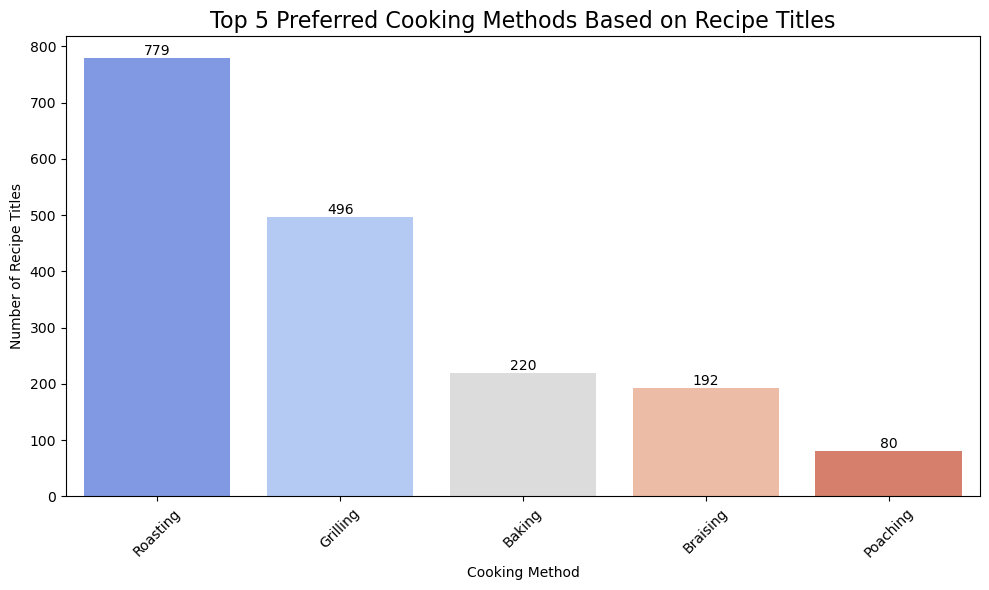

In [28]:
# Cooking methods and keywords
cooking_methods = {
    'Baking': ['bake'],
    'Boiling': ['boil'],
    'Braising': ['braise'],
    'Broiling': ['broil'],
    'Deep-frying': ['deep-fry'],
    'Grilling': ['grill'],
    'Pan-frying': ['pan-fry'],
    'Poaching': ['poach'],
    'Roasting': ['roast'],
    'Sautéing': ['sauté'],
    'Simmering': ['simmer'],
    'Steaming': ['steam'],
    'Stir-frying': ['stir-fry']
}

cooking_method_count = {method: 0 for method in cooking_methods}

for title in df['title']:
    for method, keywords in cooking_methods.items():
        for keyword in keywords:
            if keyword.lower() in title.lower():
                cooking_method_count[method] += 1
                break  

cooking_method_count_df = pd.DataFrame(list(cooking_method_count.items()), columns=['Cooking Method', 'Count'])
cooking_method_count_df = cooking_method_count_df.sort_values(by='Count', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Cooking Method', y='Count', data=cooking_method_count_df, palette='coolwarm')

for i, count in enumerate(cooking_method_count_df['Count']):
    plt.text(i, count + 0.05, f'{count}', ha='center', va='bottom')

plt.title('Top 5 Preferred Cooking Methods Based on Recipe Titles', fontsize=16)
plt.xlabel('Cooking Method')
plt.ylabel('Number of Recipe Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()